In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [23]:
# load the preprocessed data resulting from YT_preprocessing.ipynb
yt_data = pd.read_csv('yt_preprocessed.csv')
# print column names
print(yt_data.columns) 

Index(['video_id', 'title', 'description', 'published_at', 'dimension',
       'view_count', 'channel_id', 'channel_name', 'duration_minutes', 'tags',
       'tags_count', 'tags_cleaned', 'tags_originality', 'title_length',
       'final_title', 'title_originality', 'subscriber_count',
       'days_since_last_upload', 'publish_year', 'publish_month',
       'publish_day'],
      dtype='object')


In [24]:
# yt_data

## Explorative analysis

#### Distribution of nr of videos per channel

In [25]:
# The number of videos per channel
print(yt_data['channel_name'].value_counts())


channel_name
Tati                1183
Patrick Starrr       923
Lisa J               776
Manny MUA            542
Nikkie Tutorials     456
James Charles        437
Jeffree Star         383
Huda Beauty          365
ItsLikelyMakeup      323
Desi Perkins         314
Haley Kim            201
Ale-Jay              125
Bretman Rock         121
Bethany Mota          69
Michelle Phan         67
Name: count, dtype: int64


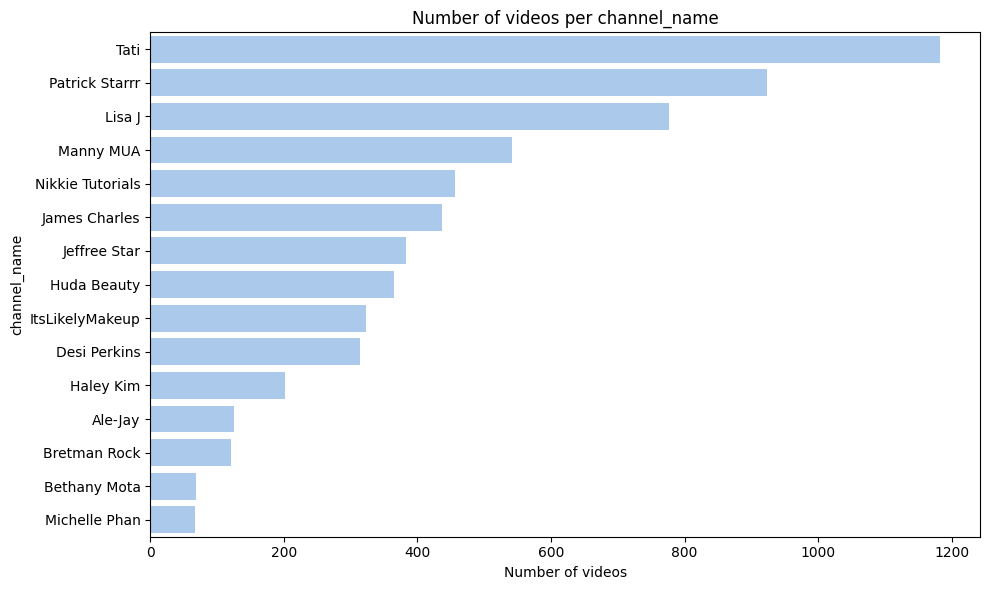

In [26]:
# bar chart for nr of videos per channel name
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
sns.countplot(data=yt_data, y='channel_name', order=yt_data['channel_name'].value_counts().index)
plt.title('Number of videos per channel_name')
plt.xlabel('Number of videos')
plt.ylabel('channel_name')
# plt.xticks(rotation=45)
plt.tight_layout()



In [27]:
# save the plot for nr of videos per channel name
plt.savefig('bar_chart_videos_per_channel.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

#### Title length

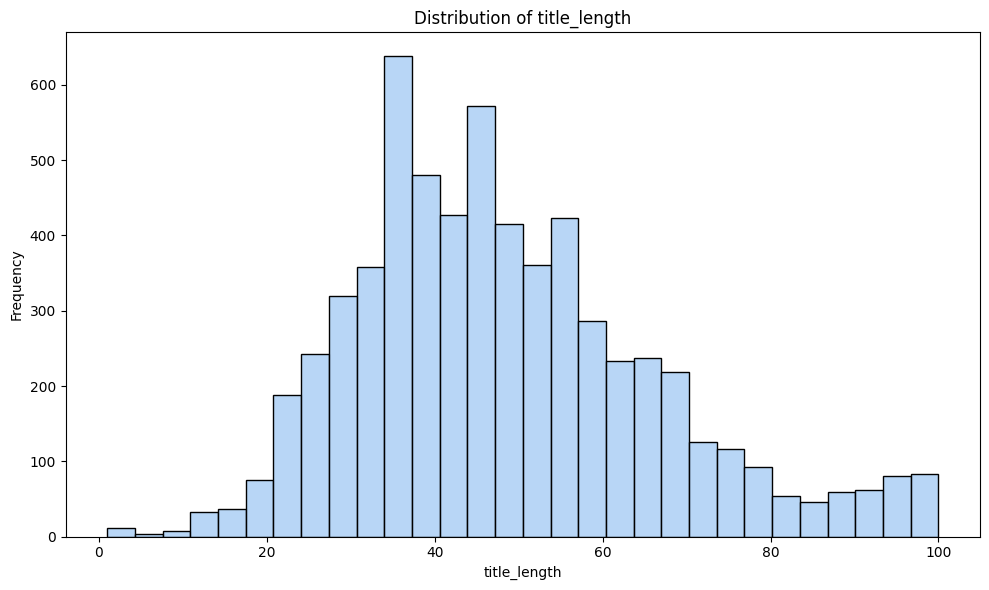

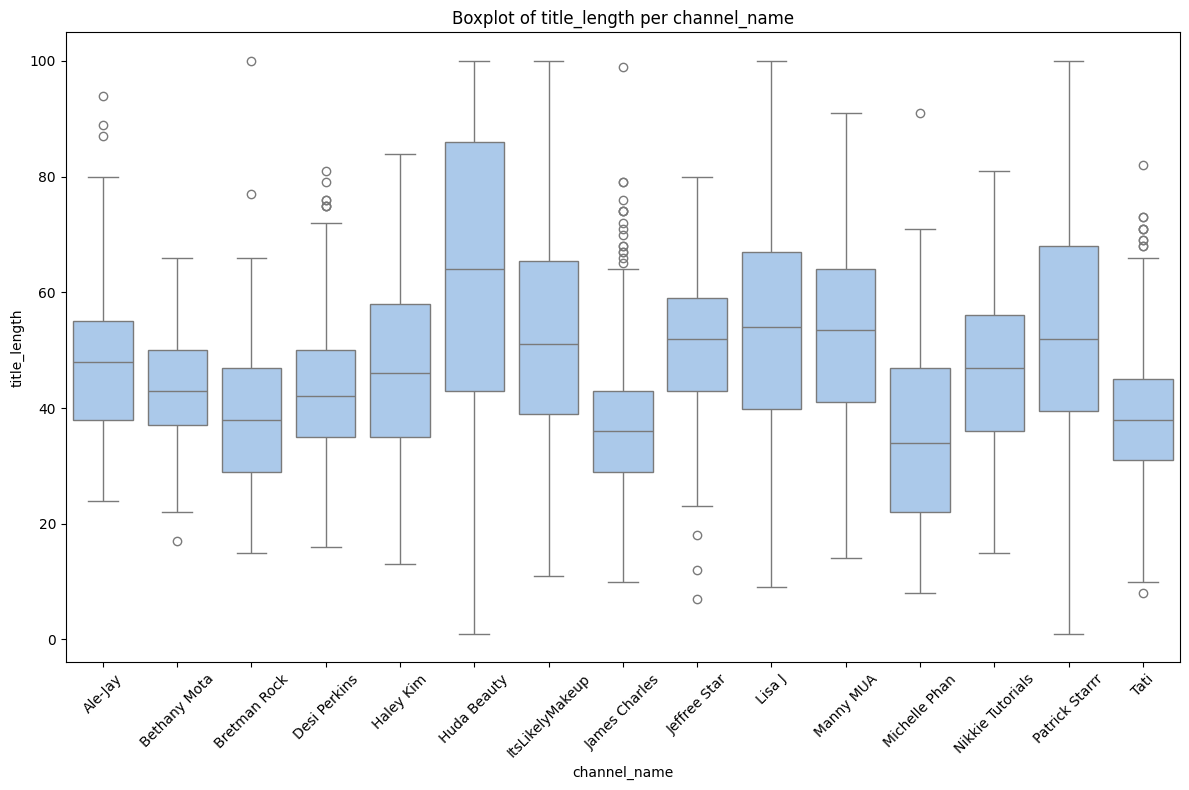

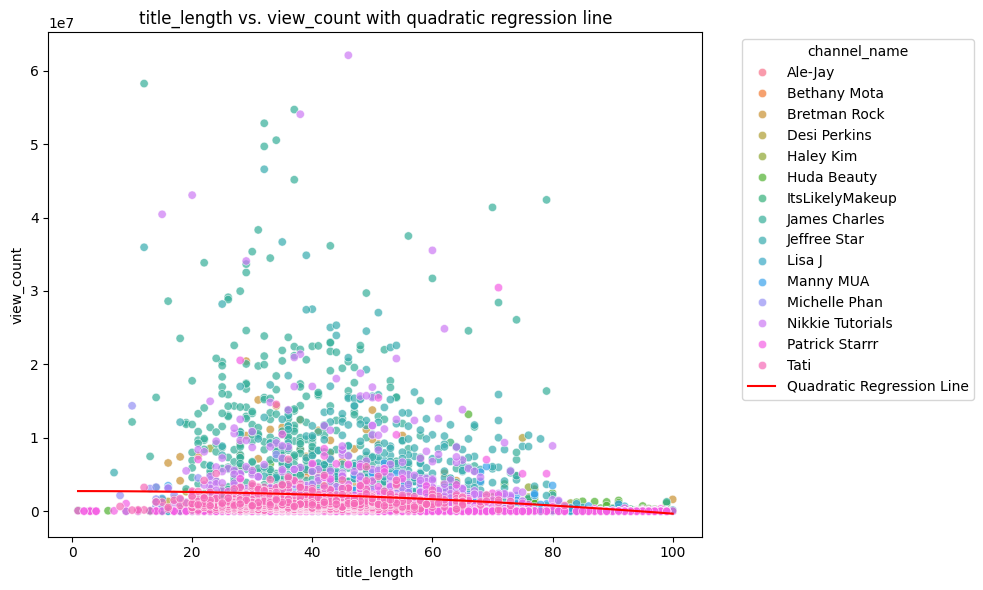

In [28]:
# distribution of title lengths
plt.figure(figsize=(10, 6))
sns.histplot(yt_data['title_length'], bins=30)
plt.title('Distribution of title_length')
plt.xlabel('title_length')
plt.ylabel('Frequency')
plt.tight_layout()
# boxplot of title lengths per channel
plt.figure(figsize=(12, 8))
sns.boxplot(data=yt_data, x='channel_name', y='title_length')   
plt.title('Boxplot of title_length per channel_name')
plt.xlabel('channel_name')
plt.ylabel('title_length')
plt.xticks(rotation=45)
plt.tight_layout()
# scatter plot of title length vs. view count
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=yt_data, x='title_length', y='view_count', hue='channel_name', alpha=0.7)
# plt.title('Title Length vs. View Count')
# plt.xlabel('Title Length')
# plt.ylabel('View Count')
# plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# scatter plot of title length vs view count with parabola regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yt_data, x='title_length', y='view_count', hue='channel_name', alpha=0.7)
# Fit a quadratic regression model
model = smf.ols('view_count ~ np.power(title_length, 2)', data=yt_data).fit()
# Generate predictions for the regression line
x_pred = np.linspace(yt_data['title_length'].min(), yt_data['title_length'].max(), 100)
y_pred = model.predict(pd.DataFrame({'title_length': x_pred}))
# Plot the regression line
plt.plot(x_pred, y_pred, color='red', label='Quadratic Regression Line')
plt.title('title_length vs. view_count with quadratic regression line')
plt.xlabel('title_length')
plt.ylabel('view_count')
plt.legend(title='channel_name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()



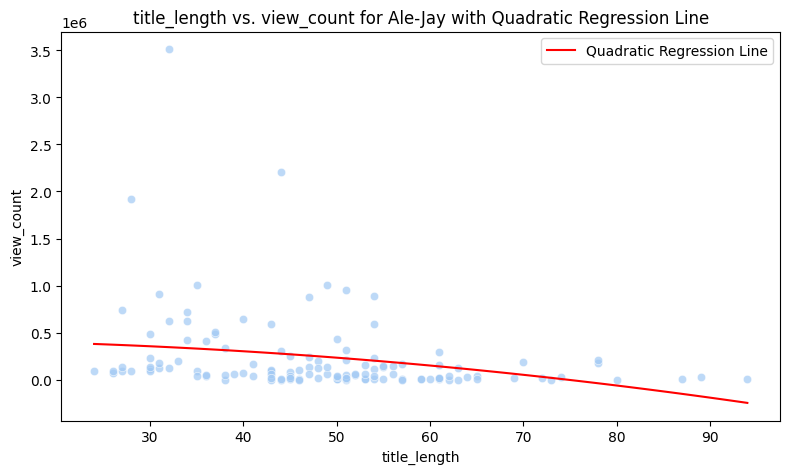

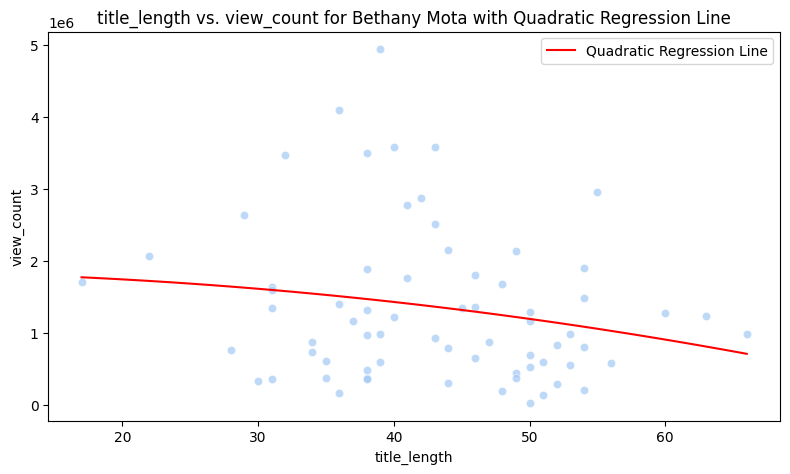

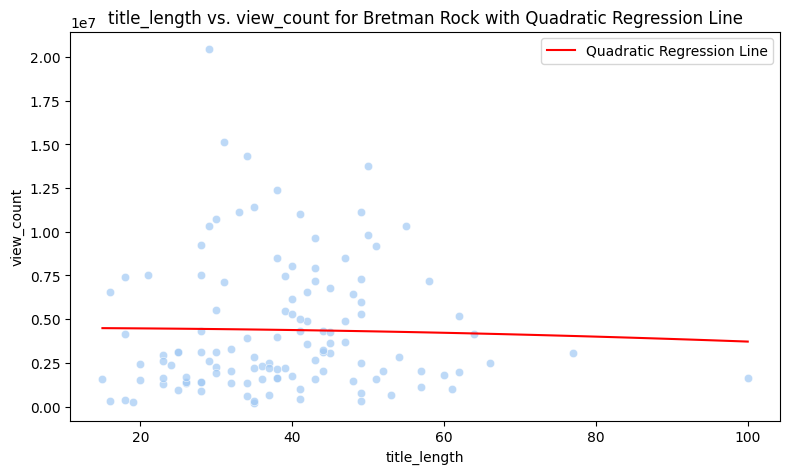

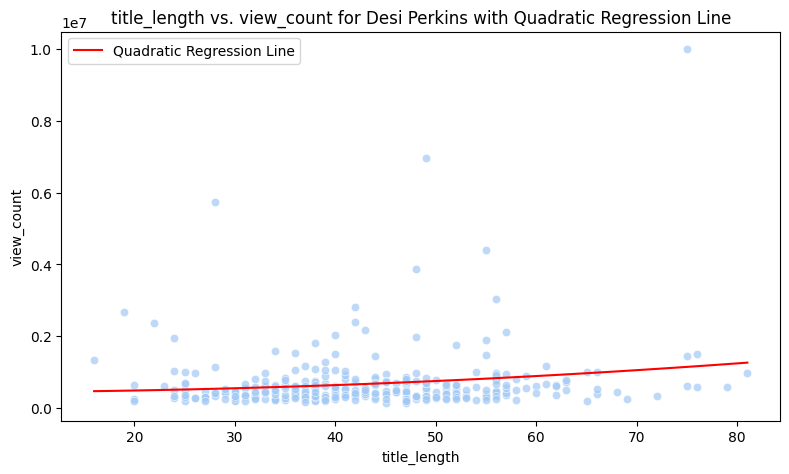

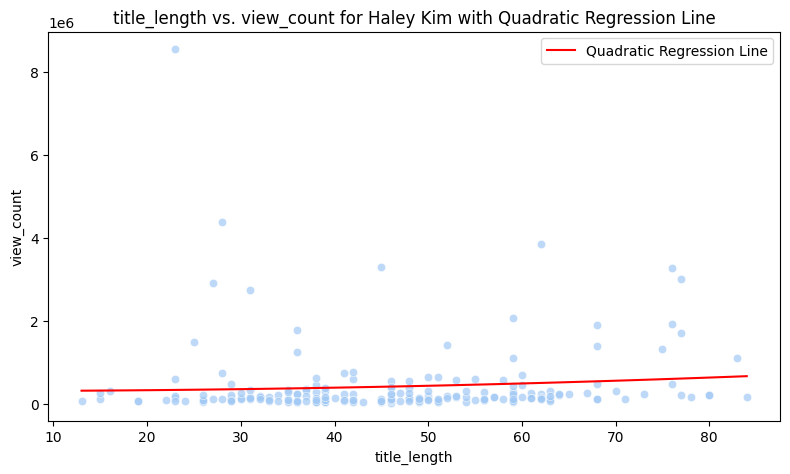

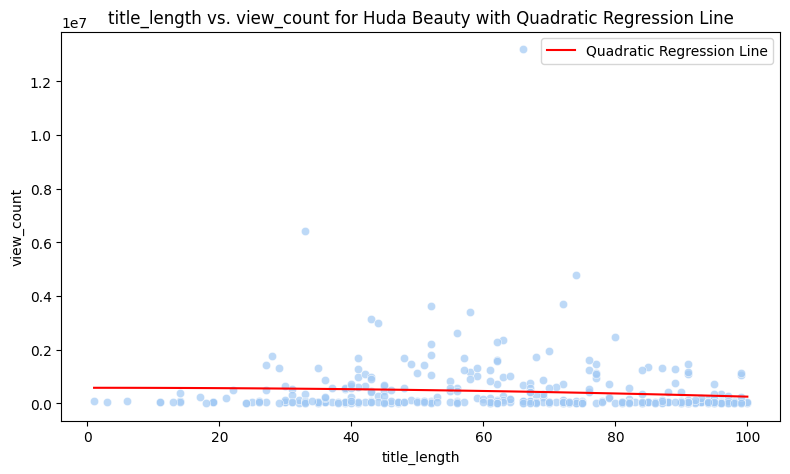

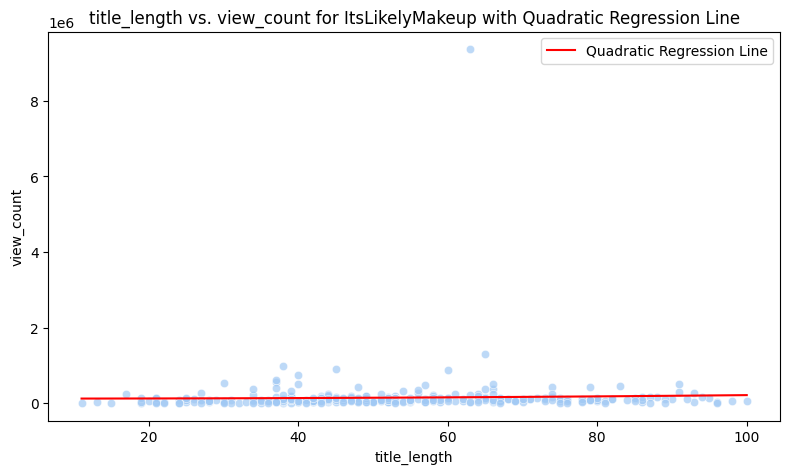

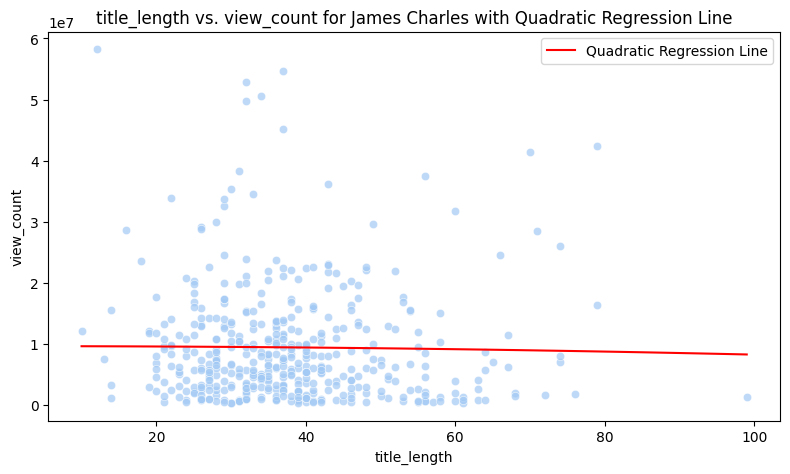

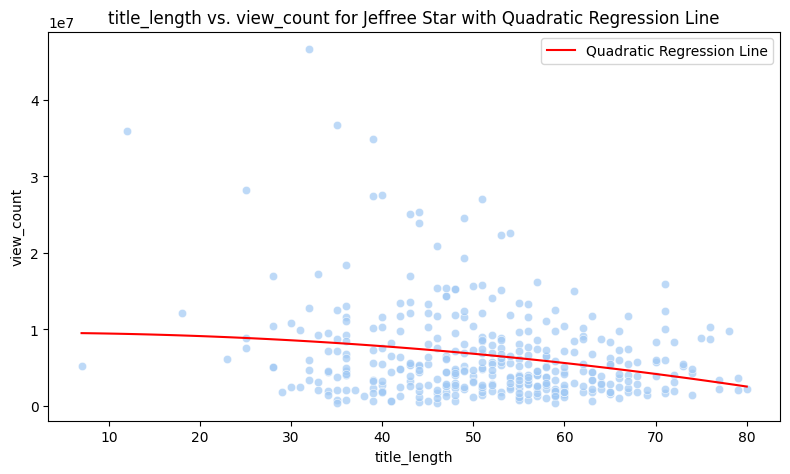

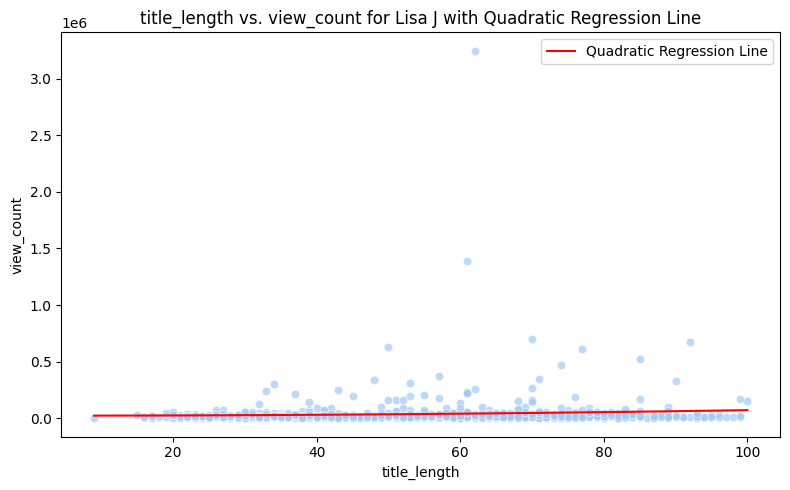

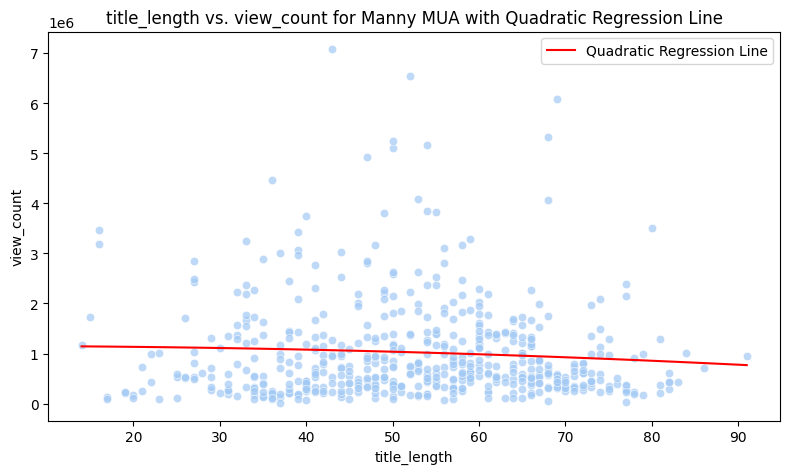

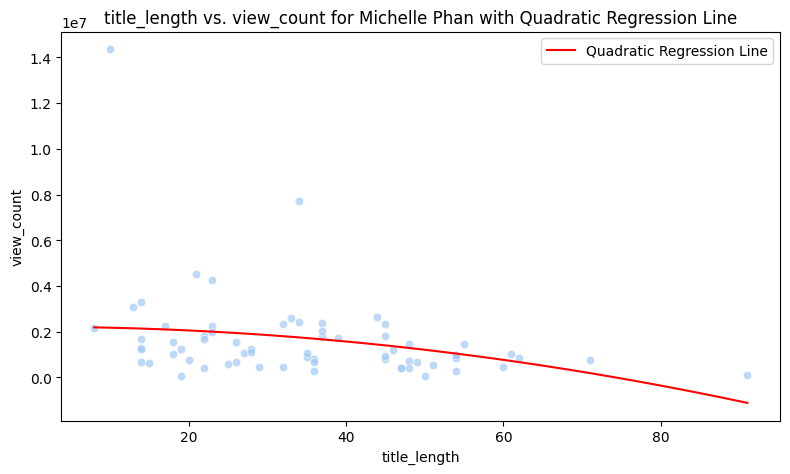

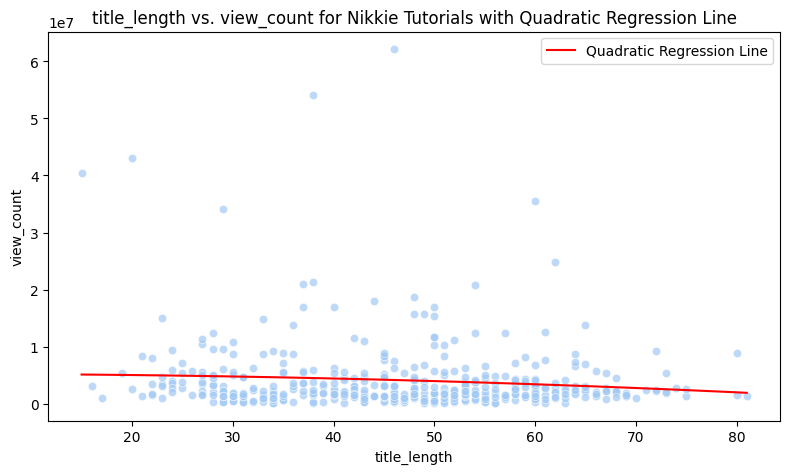

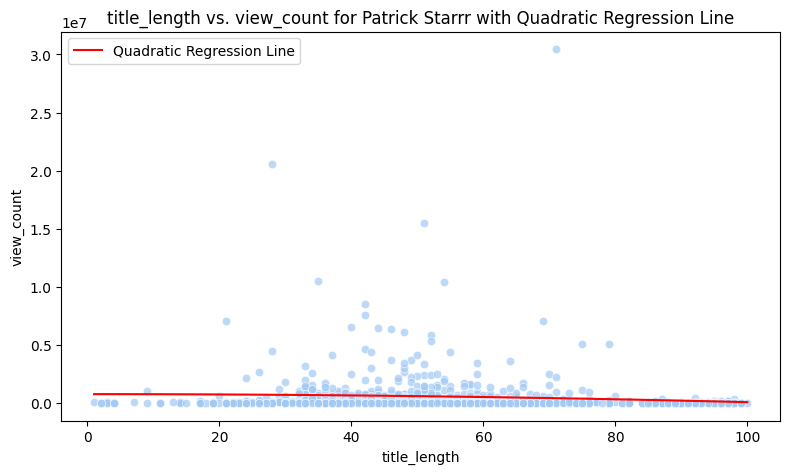

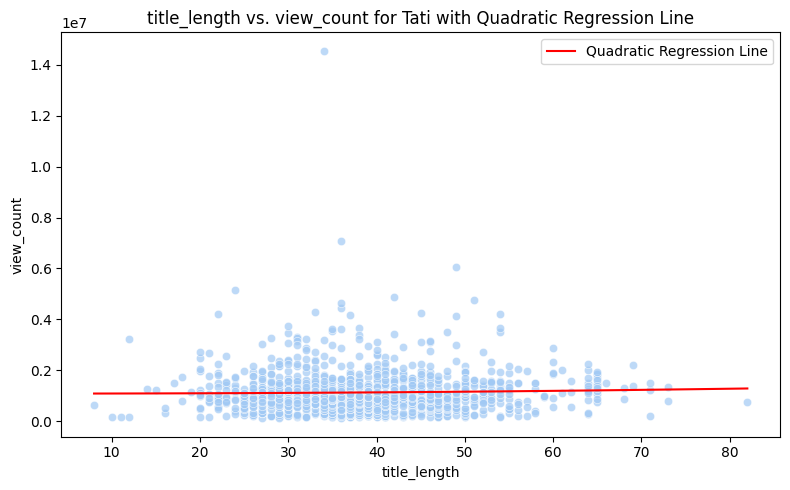

In [29]:
# scatterplot of title length vs. view count with quadratic regression line for each channel in a separate plot
channels = yt_data['channel_name'].unique()
for channel in channels:
    plt.figure(figsize=(8, 5))
    channel_data = yt_data[yt_data['channel_name'] == channel]
    sns.scatterplot(data=channel_data, x='title_length', y='view_count', alpha=0.7)
    # Fit a quadratic regression model
    model = smf.ols('view_count ~ np.power(title_length, 2)', data=channel_data).fit()
    # Generate predictions for the regression line
    x_pred = np.linspace(channel_data['title_length'].min(), channel_data['title_length'].max(), 100)
    y_pred = model.predict(pd.DataFrame({'title_length': x_pred}))
    # Plot the regression line
    plt.plot(x_pred, y_pred, color='red', label='Quadratic Regression Line')
    plt.title(f'title_length vs. view_count for {channel} with Quadratic Regression Line')
    plt.xlabel('title_length')
    plt.ylabel('view_count')
    plt.legend()
    plt.tight_layout()
    plt.show()
    

In [30]:
# min, max, mean, median, std of title lengths
print("Title Lengths - Min:", yt_data['title_length'].min())
print("Title Lengths - Max:", yt_data['title_length'].max())
print("Title Lengths - Mean:", yt_data['title_length'].mean())
print("Title Lengths - Median:", yt_data['title_length'].median())
print("Title Lengths - Std:", yt_data['title_length'].std())

Title Lengths - Min: 1
Title Lengths - Max: 100
Title Lengths - Mean: 48.307398568019096
Title Lengths - Median: 46.0
Title Lengths - Std: 17.940039577593073


#### Time period all videos fall within:

In [31]:
yt_data['published_at'].min()

'2015-01-01 00:00:06+00:00'

In [32]:
yt_data['published_at'].max()

'2024-12-29 20:00:21+00:00'

#### tags_count

In [33]:
yt_data['tags_count'].describe()

count    6285.000000
mean       18.926173
std        12.510503
min         0.000000
25%         9.000000
50%        21.000000
75%        27.000000
max        58.000000
Name: tags_count, dtype: float64

In [34]:
# the tags_count descriptives per youtube channel
yt_data.groupby('channel_name')['tags_count'].describe().sort_values(by='mean', ascending=False)

count       mean        std  min   25%   50%    75%   max
channel_name                                                                
Michelle Phan       67.0  44.044776   8.466391  9.0  38.0  46.0  50.50  56.0
Nikkie Tutorials   456.0  33.250000  11.209837  0.0  32.0  35.0  39.00  58.0
Tati              1183.0  26.430262   4.870922  0.0  23.0  26.0  29.00  47.0
Manny MUA          542.0  26.182657   9.194642  0.0  24.0  27.0  31.00  43.0
James Charles      437.0  22.178490  12.657093  0.0  19.0  26.0  31.00  40.0
Jeffree Star       383.0  21.932115   4.734920  5.0  20.0  22.0  25.00  35.0
Desi Perkins       314.0  17.675159   7.937227  0.0  11.0  17.0  23.75  39.0
Bethany Mota        69.0  16.550725   8.772511  0.0   9.0  15.0  23.00  39.0
Lisa J             776.0  15.625000   7.000081  0.0  11.0  17.0  21.00  41.0
ItsLikelyMakeup    323.0  13.690402   8.404568  0.0   8.0  13.0  19.00  38.0
Patrick Starrr     923.0   9.609967  13.185543  0.0   0.0   0.0  18.00  44.0
Haley Kim          201.0   9.303483   8.803547  0.0   0.0   8.0  18.00  31.0
Ale-Jay            125.0   7.656000   7.961707  0.0   0.0   7.0  13.00  33.0
Bretman Rock       121.0   6.669421   8.210145  0.0   0.0   5.0  10.00  40.0
Huda Beauty        365.0   4.232877   7.977855  0.0   0.0   0.0   0.00  42.0

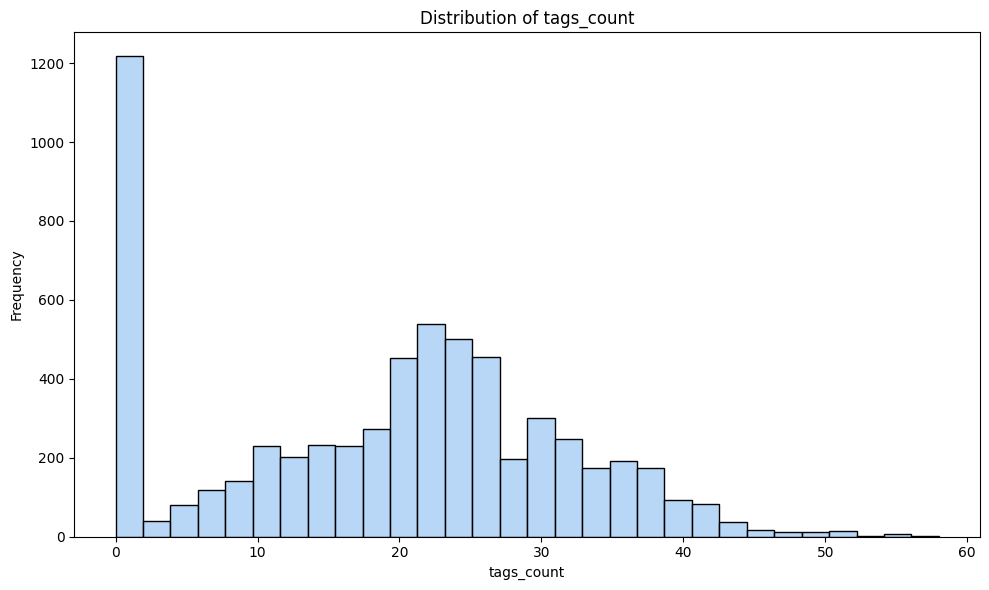

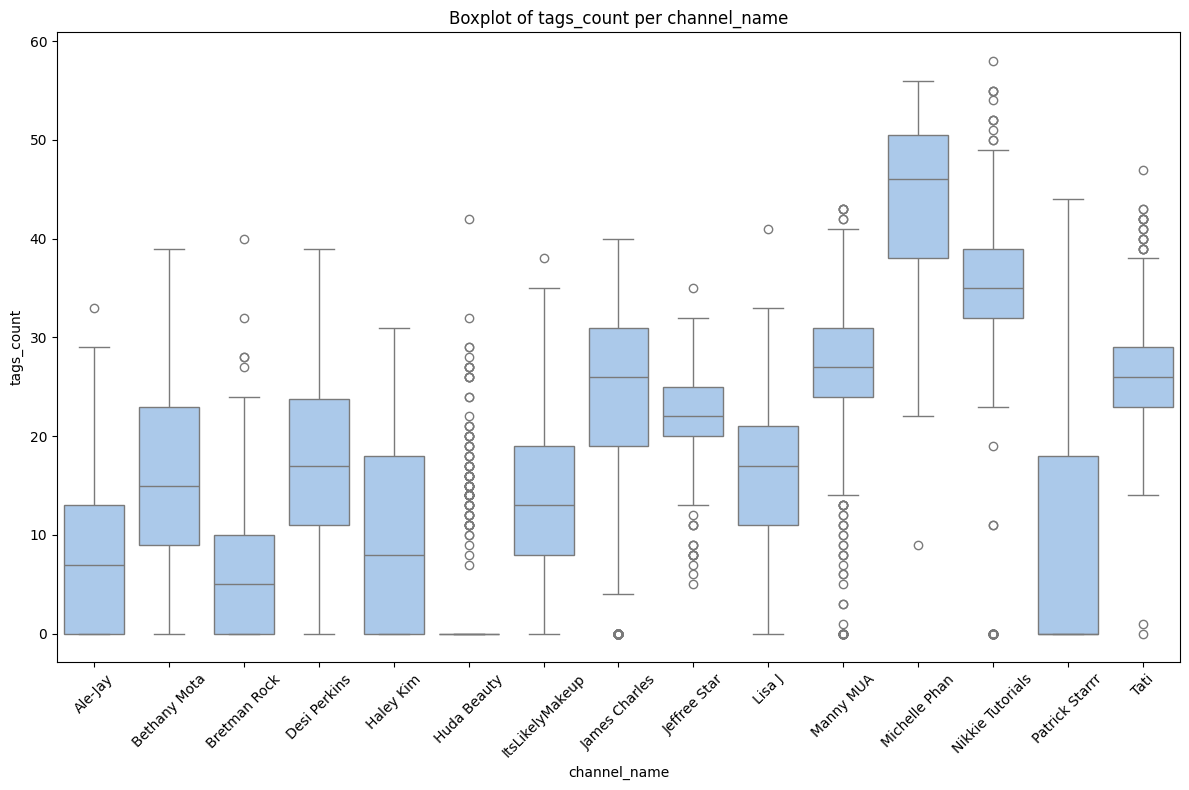

In [35]:
# distribution of tags counts
plt.figure(figsize=(10, 6))
sns.histplot(yt_data['tags_count'], bins=30)
plt.title('Distribution of tags_count')
plt.xlabel('tags_count')
plt.ylabel('Frequency')
plt.tight_layout()
# boxplot of tags counts per channel
plt.figure(figsize=(12, 8))
sns.boxplot(data=yt_data, x='channel_name', y='tags_count')   
plt.title('Boxplot of tags_count per channel_name')
plt.xlabel('channel_name')
plt.ylabel('tags_count')
plt.xticks(rotation=45)
plt.tight_layout()

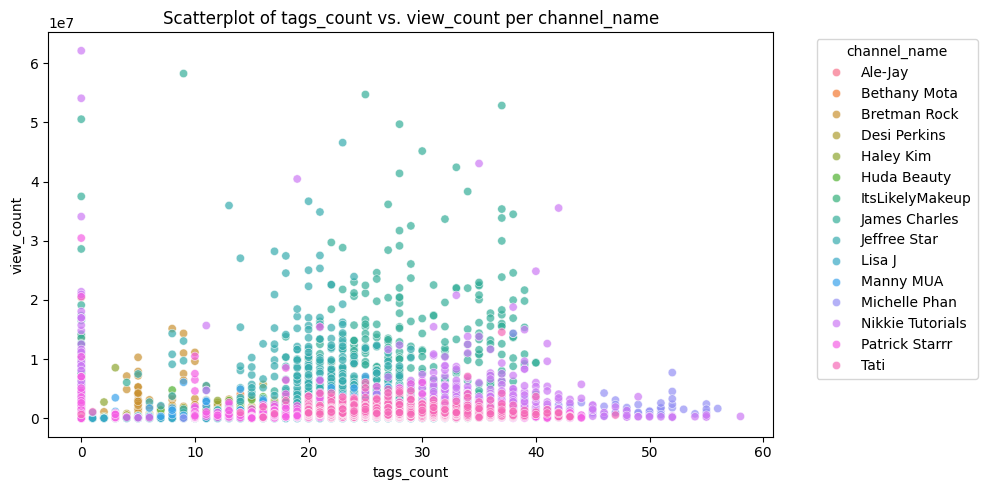

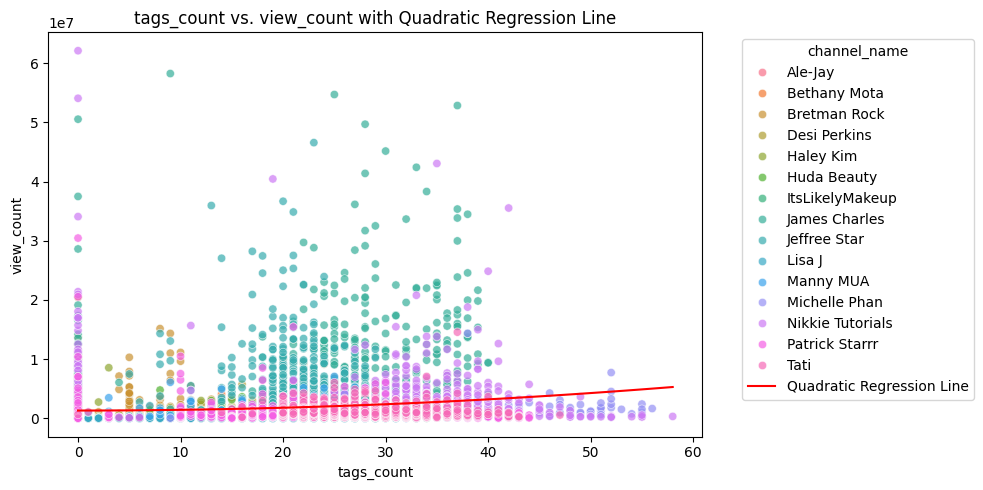

In [36]:
# scatterplot of tags_count vs. views per channel
plt.figure(figsize=(10, 5))
sns.scatterplot(data=yt_data, x='tags_count', y='view_count', hue='channel_name', alpha=0.7)
plt.title('Scatterplot of tags_count vs. view_count per channel_name')
plt.xlabel('tags_count')
plt.ylabel('view_count')
plt.legend(title='channel_name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# scatterplot of tags_count vs. views per channel with quadratic regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(data=yt_data, x='tags_count', y='view_count', hue='channel_name', alpha=0.7)
# Fit a quadratic regression model
model = smf.ols('view_count ~ np.power(tags_count, 2)', data=yt_data).fit()
# Generate predictions for the regression line
x_pred = np.linspace(yt_data['tags_count'].min(), yt_data['tags_count'].max(), 100)
y_pred = model.predict(pd.DataFrame({'tags_count': x_pred}))
# Plot the regression line
plt.plot(x_pred, y_pred, color='red', label='Quadratic Regression Line')
plt.title('tags_count vs. view_count with Quadratic Regression Line')
plt.xlabel('tags_count')
plt.ylabel('view_count')
plt.legend(title='channel_name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


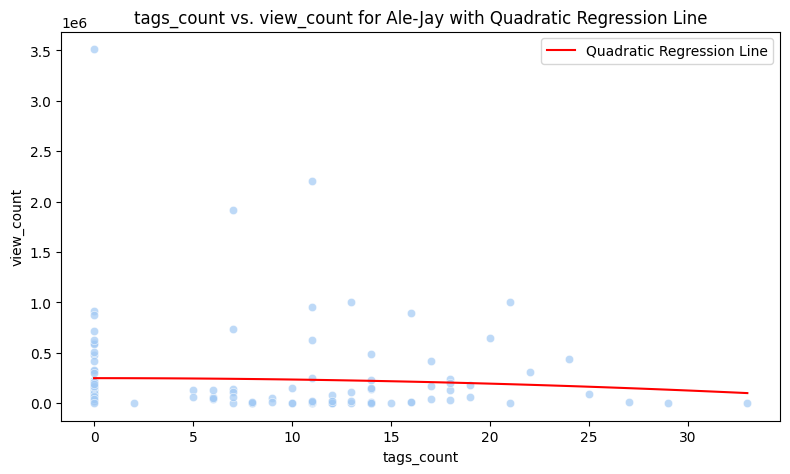

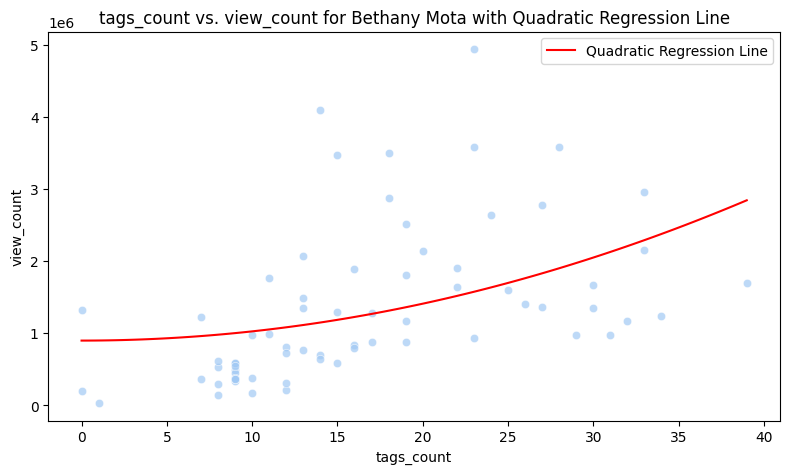

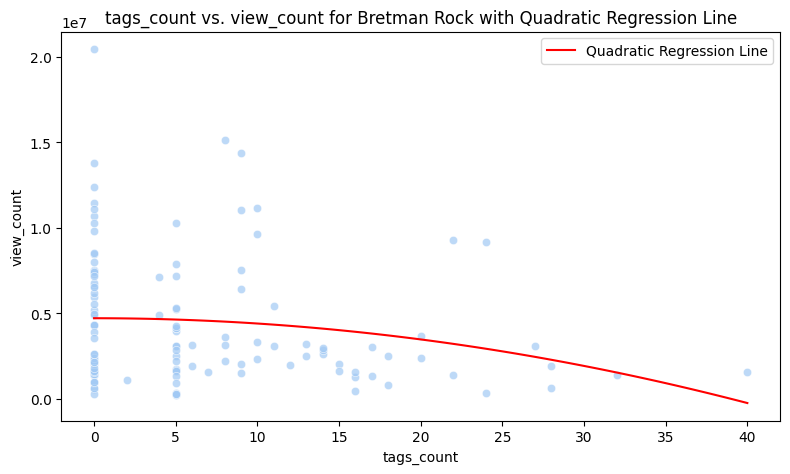

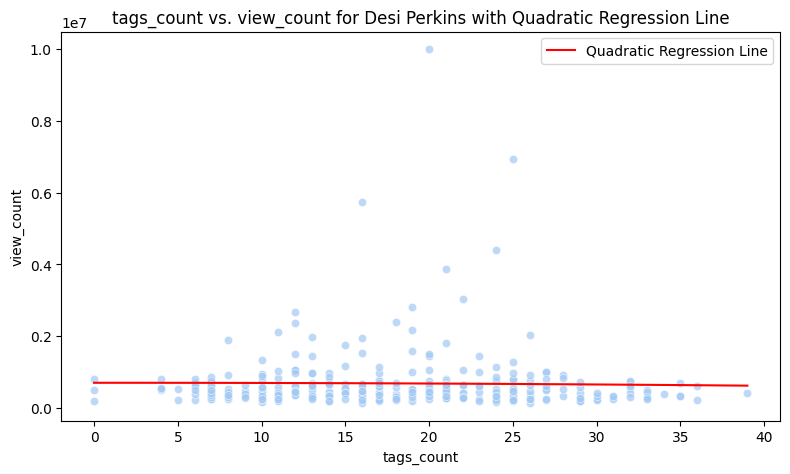

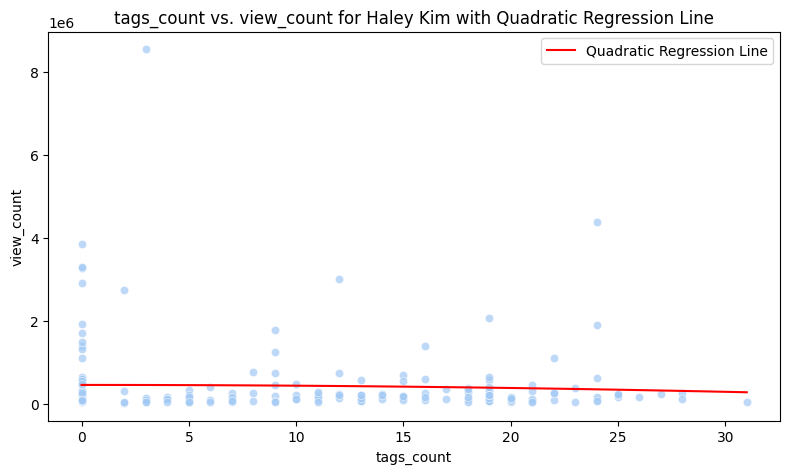

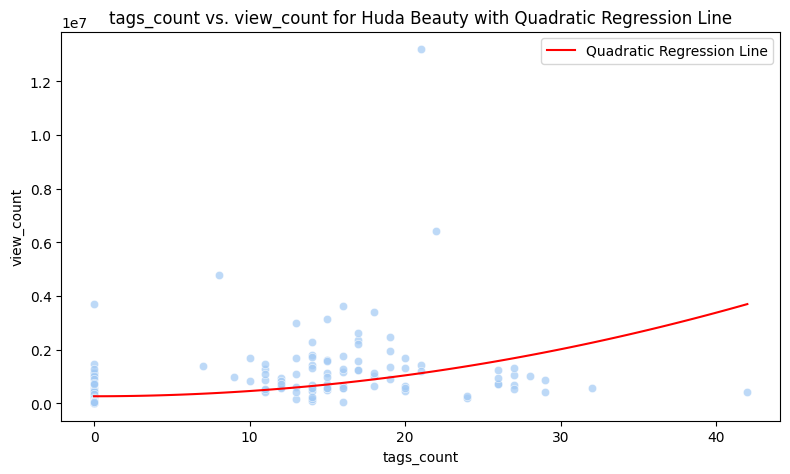

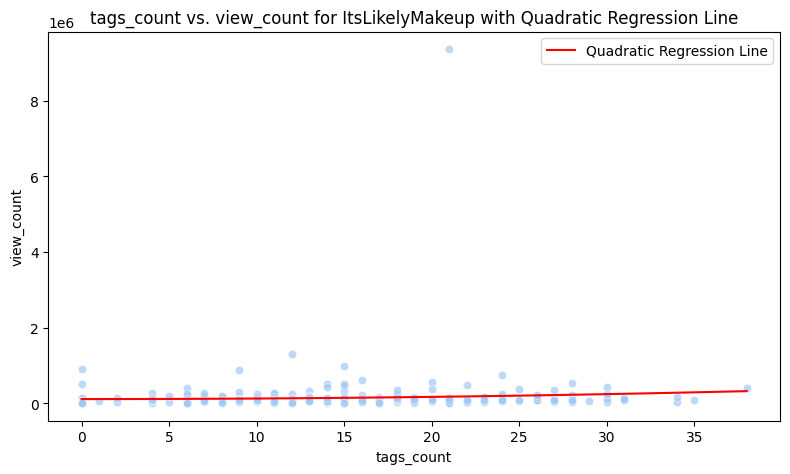

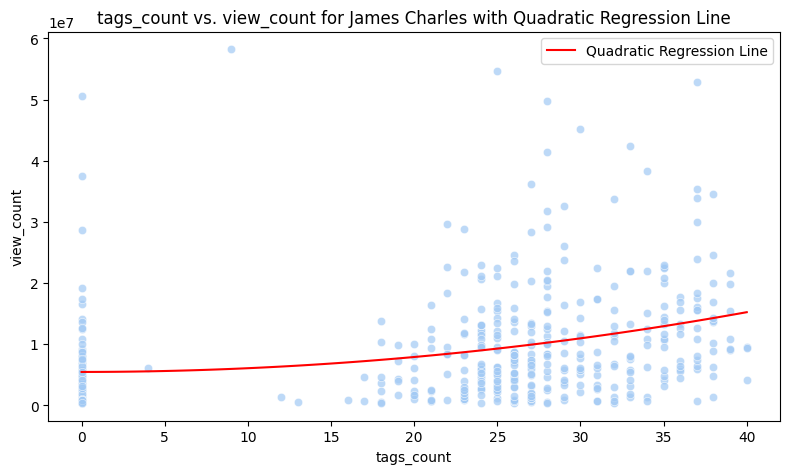

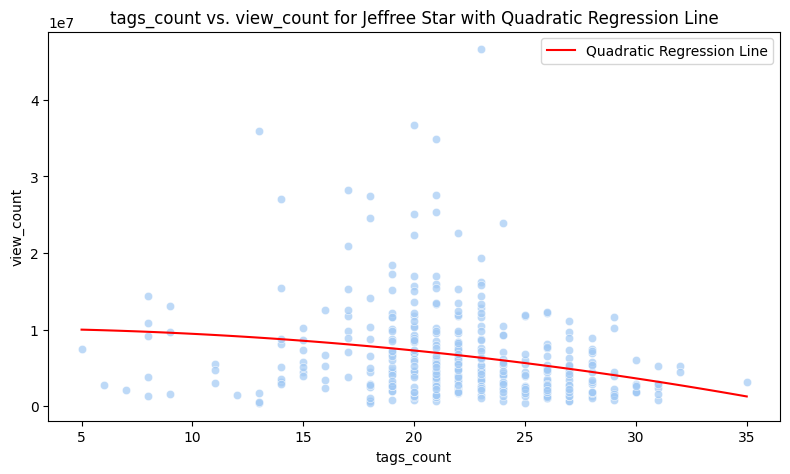

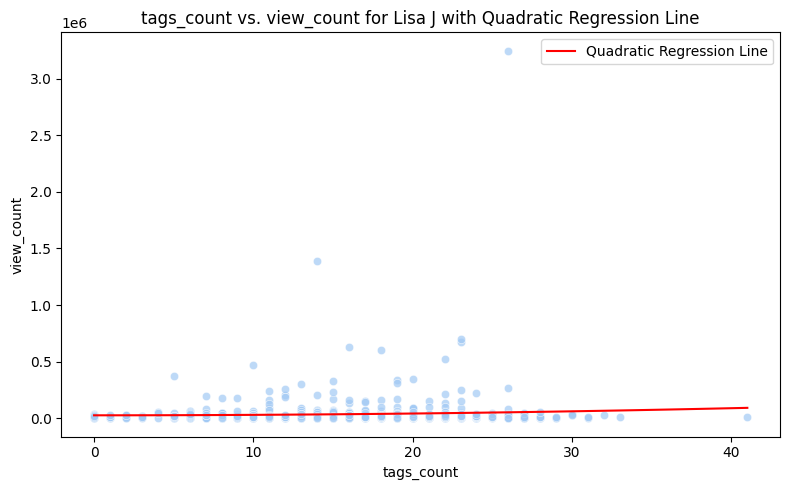

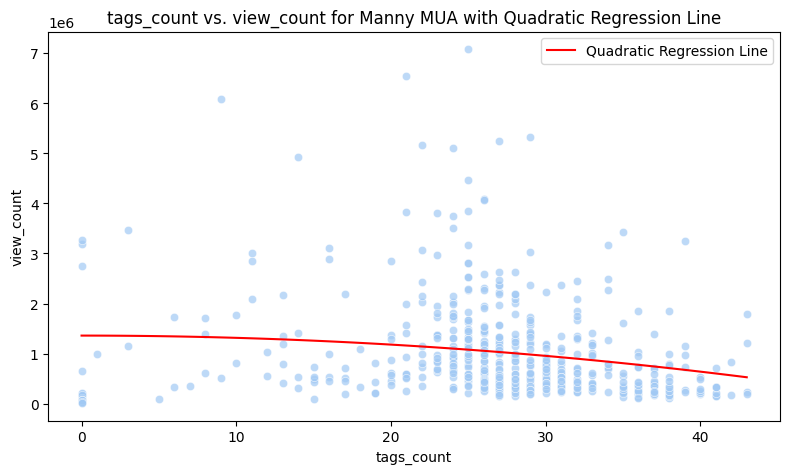

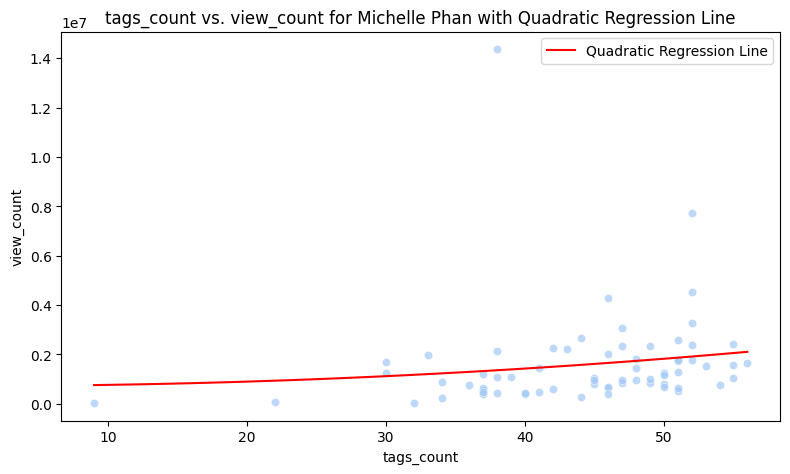

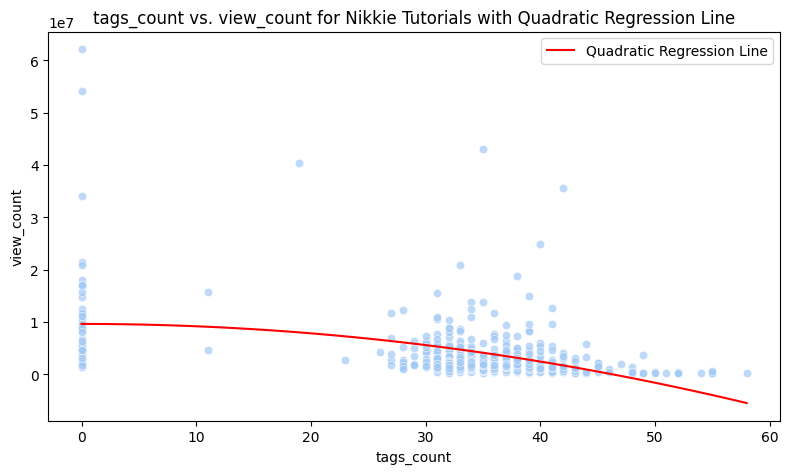

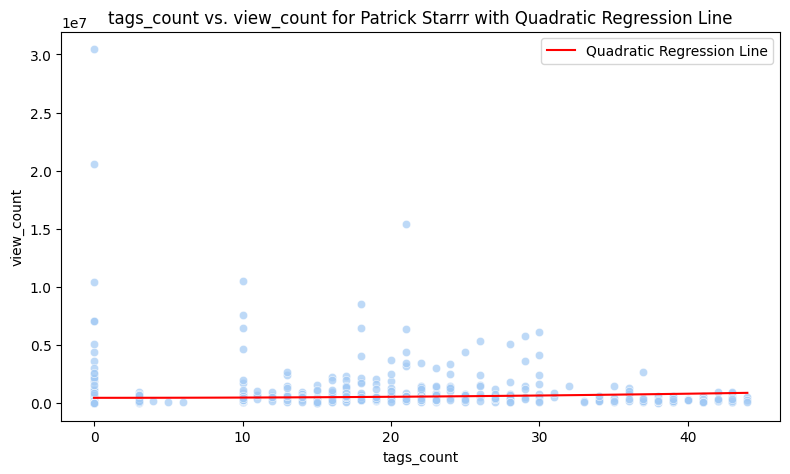

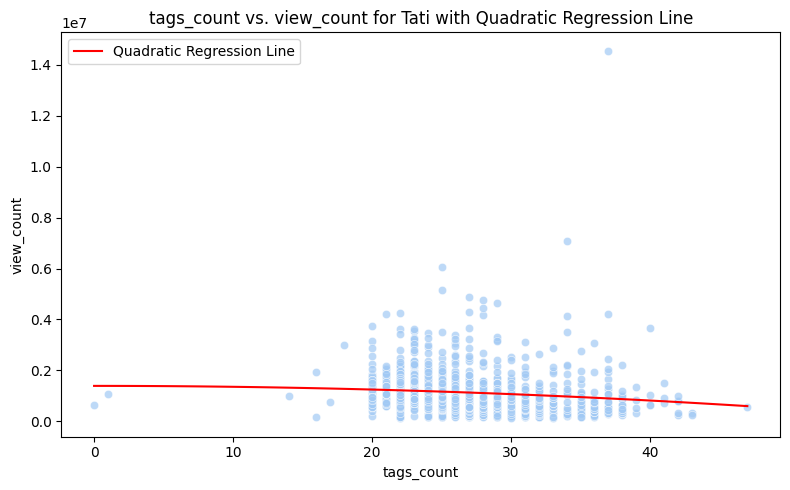

In [37]:
# scatterplot of tags_count vs. view_count with quadratic regression line for each channel in a seprate plot
channels = yt_data['channel_name'].unique()
for channel in channels:
    plt.figure(figsize=(8, 5))
    channel_data = yt_data[yt_data['channel_name'] == channel]
    sns.scatterplot(data=channel_data, x='tags_count', y='view_count', alpha=0.7)
    
    # Fit a quadratic regression model
    model = smf.ols('view_count ~ np.power(tags_count, 2)', data=channel_data).fit()
    
    # Generate predictions for the regression line
    x_pred = np.linspace(channel_data['tags_count'].min(), channel_data['tags_count'].max(), 100)
    y_pred = model.predict(pd.DataFrame({'tags_count': x_pred}))
    
    # Plot the regression line
    plt.plot(x_pred, y_pred, color='red', label='Quadratic Regression Line')
    
    plt.title(f'tags_count vs. view_count for {channel} with Quadratic Regression Line')
    plt.xlabel('tags_count')
    plt.ylabel('view_count')
    plt.legend()
    plt.tight_layout()
    plt.show()
    

In [38]:
# the optimum of the function tags_count vs view_count. the point where the slope is zero
def find_optimum(x, y):
    model = smf.ols('y ~ x + I(x**2)', data=pd.DataFrame({'x': x, 'y': y})).fit()
    optimum_x = -model.params['x'] / (2 * model.params['I(x ** 2)'])
    optimum_y = model.predict({'x': optimum_x})
    return optimum_x, optimum_y

print(find_optimum(yt_data['tags_count'], yt_data['view_count']))
# So optimal nr of tags would be 37, which seems quite high, but not impossible.

(125.97181454707504, 0    4.656062e+06
dtype: float64)


In [39]:
# min, mac, mean, median, std of tags counts
print("Tags Counts - Min:", yt_data['tags_count'].min())
print("Tags Counts - Max:", yt_data['tags_count'].max())
print("Tags Counts - Mean:", yt_data['tags_count'].mean())
print("Tags Counts - Median:", yt_data['tags_count'].median())
print("Tags Counts - Std:", yt_data['tags_count'].std())

Tags Counts - Min: 0
Tags Counts - Max: 58
Tags Counts - Mean: 18.926173428798727
Tags Counts - Median: 21.0
Tags Counts - Std: 12.51050319057198


#### title_originality

In [41]:
yt_data['title_originality'].describe()

count    6285.000000
mean        0.329042
std         0.121961
min         0.000000
25%         0.246917
50%         0.322314
75%         0.408480
max         0.708123
Name: title_originality, dtype: float64

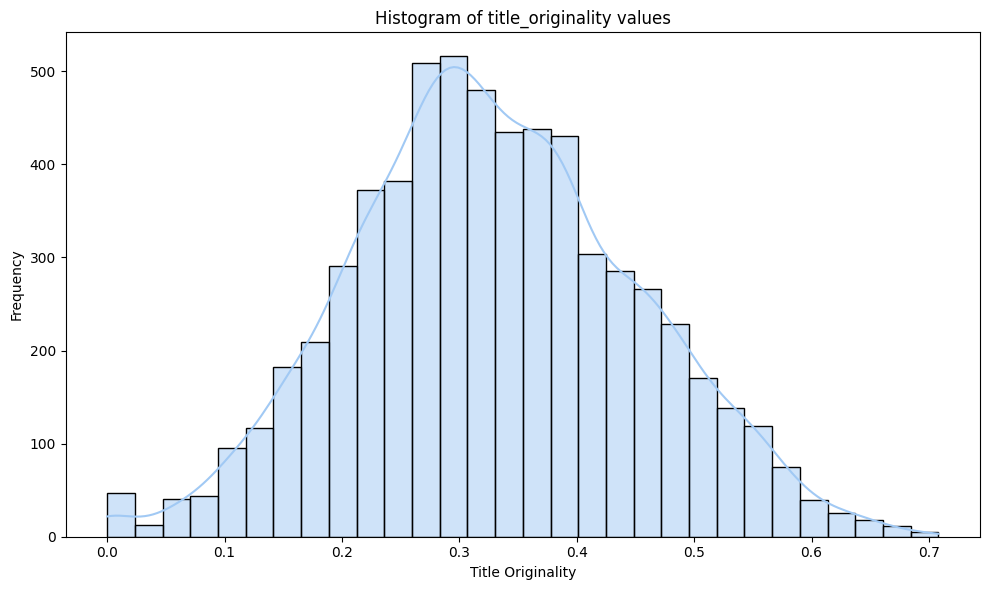

In [42]:
# histogram of title similarity values
plt.figure(figsize=(10, 6))
sns.histplot(yt_data['title_originality'], bins=30, kde=True)
plt.title('Histogram of title_originality values')
plt.xlabel('Title Originality')
plt.ylabel('Frequency')
plt.tight_layout()


In [43]:
# save the plot as "histogram_title_similarity.png"
plt.savefig('histogram_title_similarity.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [44]:
# title_similarity descriptives per youtube channel
yt_data.groupby('channel_name')['title_originality'].describe().sort_values(by='mean', ascending=False)

count      mean       std           min       25%  \
channel_name                                                           
Michelle Phan       67.0  0.423347  0.114175  1.055340e-01  0.348288   
Bretman Rock       121.0  0.399338  0.135470  2.384186e-07  0.335900   
Bethany Mota        69.0  0.397285  0.106576  8.188152e-02  0.341072   
Patrick Starrr     923.0  0.375577  0.133205  0.000000e+00  0.291945   
Huda Beauty        365.0  0.369767  0.104203  0.000000e+00  0.305727   
Desi Perkins       314.0  0.338129  0.107514  0.000000e+00  0.278250   
Tati              1183.0  0.331010  0.112048  0.000000e+00  0.264883   
James Charles      437.0  0.329719  0.137380  0.000000e+00  0.228604   
Manny MUA          542.0  0.310044  0.122539  0.000000e+00  0.232839   
Jeffree Star       383.0  0.309790  0.117253  0.000000e+00  0.225035   
Lisa J             776.0  0.309438  0.102855  0.000000e+00  0.234246   
Haley Kim          201.0  0.307983  0.095248  6.212592e-02  0.243872   
Nikkie Tutorials   456.0  0.289774  0.124499  0.000000e+00  0.206348   
Ale-Jay            125.0  0.279914  0.106236  5.264485e-02  0.205855   
ItsLikelyMakeup    323.0  0.261971  0.103726  1.192093e-07  0.195010   

                       50%       75%       max  
channel_name                                    
Michelle Phan     0.440670  0.512115  0.668595  
Bretman Rock      0.414690  0.493848  0.672948  
Bethany Mota      0.427141  0.475166  0.561205  
Patrick Starrr    0.379484  0.472722  0.701100  
Huda Beauty       0.366972  0.442556  0.638362  
Desi Perkins      0.341506  0.406302  0.641674  
Tati              0.323385  0.400938  0.661291  
James Charles     0.326679  0.424704  0.654763  
Manny MUA         0.307116  0.382891  0.708123  
Jeffree Star      0.310344  0.386377  0.646440  
Lisa J            0.297103  0.373497  0.705518  
Haley Kim         0.289696  0.365343  0.663837  
Nikkie Tutorials  0.277573  0.365726  0.637820  
Ale-Jay           0.276247  0.341936  0.583431  
ItsLikelyMakeup   0.247599  0.315089  0.648400

#### subscriber_count

In [45]:
yt_data['subscriber_count'].describe()

count    6.285000e+03
mean     7.224340e+06
std      6.408504e+06
min      3.480000e+05
25%      3.140000e+06
50%      4.840000e+06
75%      7.990000e+06
max      2.400000e+07
Name: subscriber_count, dtype: float64

In [46]:
# print all unique combinations of channel_name and subscriber_count
yt_data[['channel_name', 'subscriber_count']].drop_duplicates().sort_values(by='subscriber_count', ascending=False)

channel_name  subscriber_count
1518     James Charles          24000000
1955      Jeffree Star          15700000
3723  Nikkie Tutorials          14800000
125       Bethany Mota           9360000
194       Bretman Rock           8770000
3656     Michelle Phan           8560000
5102              Tati           7990000
3114         Manny MUA           4840000
4179    Patrick Starrr           4830000
830        Huda Beauty           4170000
315       Desi Perkins           3140000
629          Haley Kim           1320000
1195   ItsLikelyMakeup            685000
0              Ale-Jay            611000
2338            Lisa J            348000

#### duration_minutes

In [47]:
yt_data['duration_minutes'].describe()

count    6285.000000
mean       12.169690
std         8.573975
min         0.066667
25%         5.600000
50%        12.283333
75%        17.500000
max        87.133333
Name: duration_minutes, dtype: float64

In [48]:
# duration_minutes descriptives per youtube channel
yt_data.groupby('channel_name')['duration_minutes'].describe().sort_values(by='mean', ascending=False)

count       mean        std       min        25%  \
channel_name                                                          
Jeffree Star       383.0  18.717363   7.064471  0.983333  13.750000   
Manny MUA          542.0  17.325707   7.824900  0.133333  12.383333   
Bretman Rock       121.0  15.578650   6.303021  0.250000  11.816667   
Tati              1183.0  14.701522   5.719828  0.650000  10.900000   
Desi Perkins       314.0  14.510563   6.800081  0.900000  10.366667   
James Charles      437.0  14.095271  10.352812  0.100000   5.616667   
Nikkie Tutorials   456.0  12.888304   5.801178  0.216667  10.112500   
Lisa J             776.0  12.528436   8.346173  0.100000   6.691667   
ItsLikelyMakeup    323.0  11.510630   7.038321  0.200000   5.950000   
Bethany Mota        69.0   8.315217   3.076865  0.266667   6.250000   
Michelle Phan       67.0   7.584826   4.542662  0.166667   5.241667   
Patrick Starrr     923.0   7.249296   9.602179  0.083333   0.566667   
Haley Kim          201.0   5.539635   4.649515  0.116667   0.650000   
Ale-Jay            125.0   4.421333   6.292682  0.350000   0.750000   
Huda Beauty        365.0   3.227717   5.158498  0.066667   0.366667   

                        50%        75%        max  
channel_name                                       
Jeffree Star      17.366667  23.341667  46.483333  
Manny MUA         17.016667  22.429167  39.733333  
Bretman Rock      15.916667  18.700000  32.733333  
Tati              13.833333  18.191667  52.266667  
Desi Perkins      13.683333  17.462500  57.516667  
James Charles     14.500000  19.450000  77.366667  
Nikkie Tutorials  12.816667  16.533333  33.766667  
Lisa J            12.641667  18.120833  43.516667  
ItsLikelyMakeup   11.500000  16.058333  42.616667  
Bethany Mota       7.966667   9.633333  17.233333  
Michelle Phan      6.866667   9.358333  25.716667  
Patrick Starrr     1.000000  13.225000  87.133333  
Haley Kim          5.766667   8.900000  18.283333  
Ale-Jay            0.950000   9.116667  28.733333  
Huda Beauty        0.833333   1.016667  30.383333

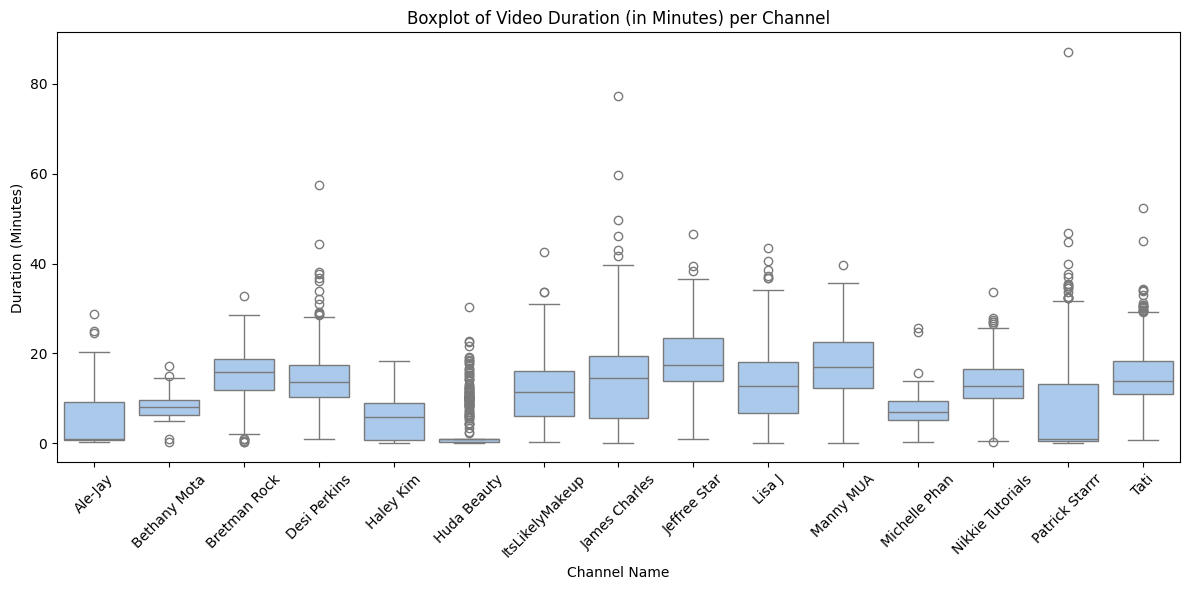

In [49]:
# boxplot of duration_minutes per channel
plt.figure(figsize=(12, 6))
sns.boxplot(data=yt_data, x='channel_name', y='duration_minutes')
plt.title('Boxplot of Video Duration (in Minutes) per Channel')
plt.xlabel('Channel Name')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()

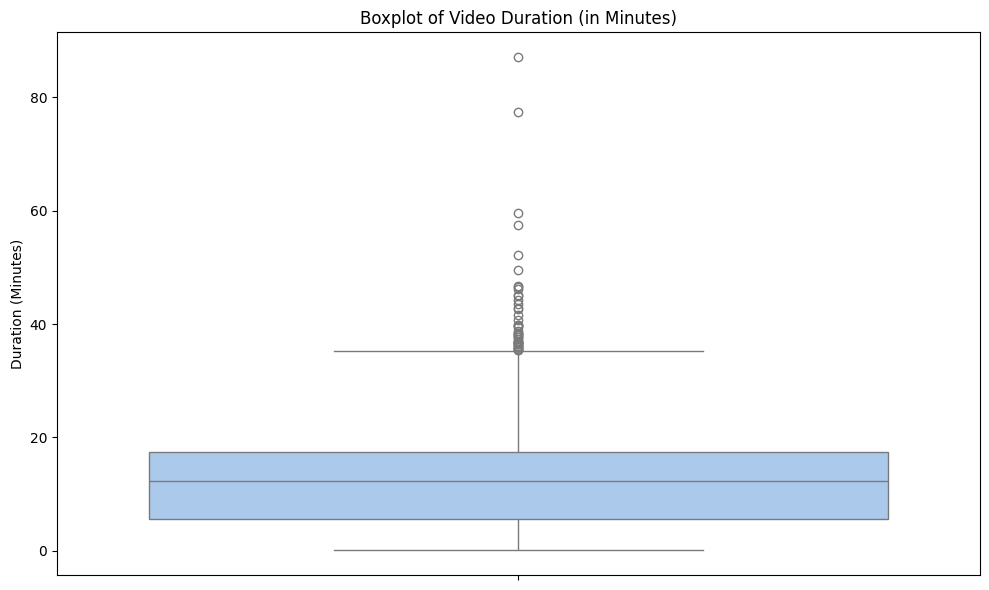

In [50]:
# boxplot of duration_minutes 
plt.figure(figsize=(10, 6))
sns.boxplot(data=yt_data, y='duration_minutes')
plt.title('Boxplot of Video Duration (in Minutes)')
plt.ylabel('Duration (Minutes)')
plt.tight_layout()

#### days_since_last_upload

In [53]:
yt_data['days_since_last_upload'].describe()

count    6285.000000
mean        7.047017
std        33.469390
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       918.000000
Name: days_since_last_upload, dtype: float64

#### publish_year, publish_month, and publish_day

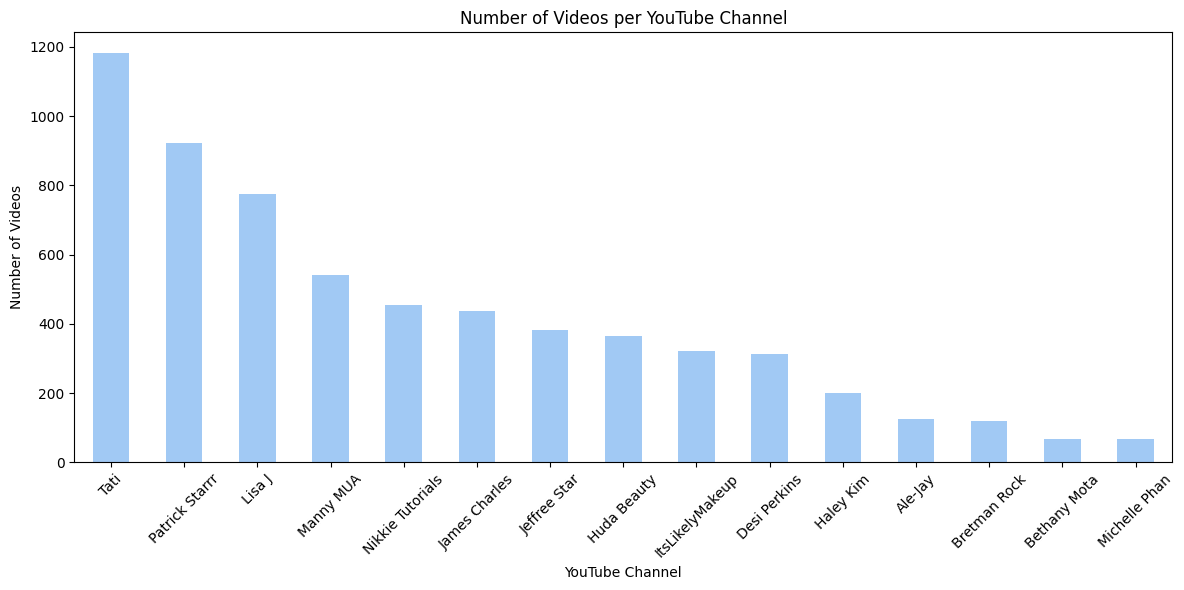

In [57]:
# nr of videos per channel in a bar chart
yt_data['channel_name'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Number of Videos per YouTube Channel')
plt.xlabel('YouTube Channel')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

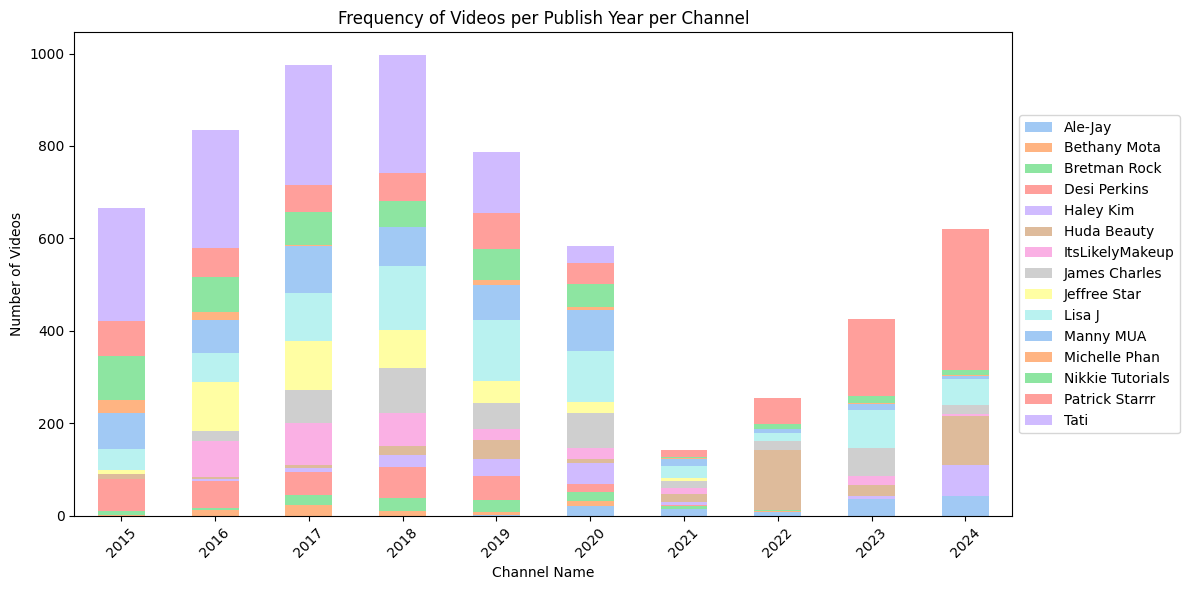

In [58]:
# the frequency of videos per publish_year per channel
yt_data.groupby(['publish_year', 'channel_name']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Frequency of Videos per Publish Year per Channel')
plt.xlabel('Channel Name')
plt.xticks(rotation=45)
plt.ylabel('Number of Videos')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [59]:
# save the plot as "stacked_bar_publish_year_channel.png"
plt.savefig('stacked_bar_publish_year_channel.png', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

C:\Users\20193694\AppData\Local\Temp\ipykernel_16276\1554484476.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yt_data.groupby(['publish_month', 'channel_name']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))


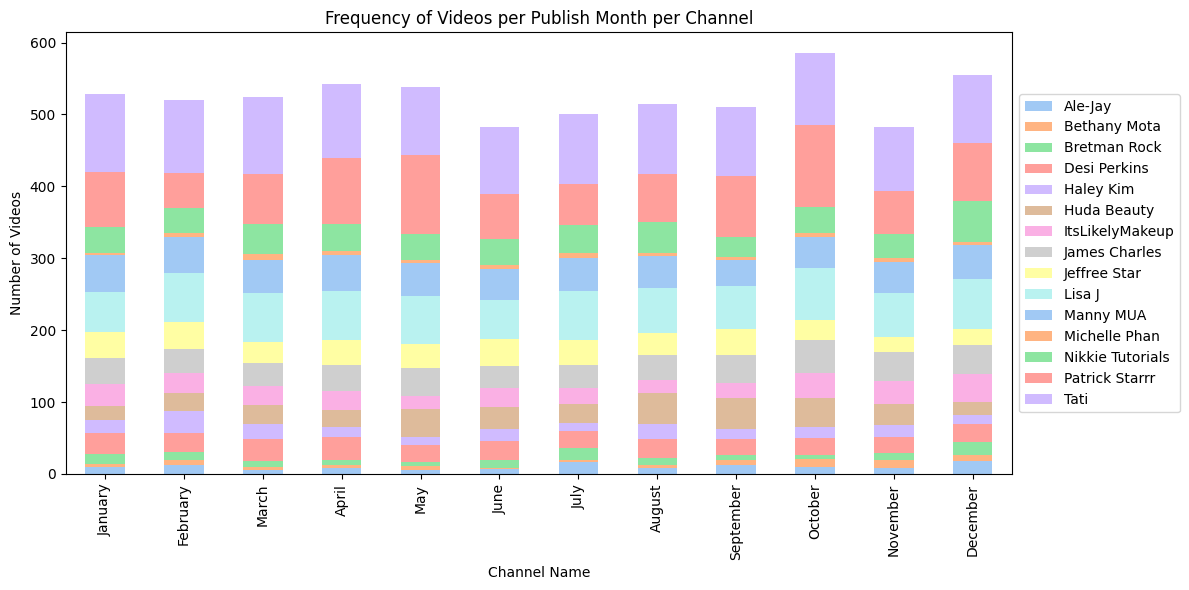

In [60]:
# the frequency of videos uploaded per month per channel
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
yt_data['publish_month'] = pd.Categorical(yt_data['publish_month'], categories=months_order, ordered=True)


yt_data.groupby(['publish_month', 'channel_name']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Frequency of Videos per Publish Month per Channel')
plt.xlabel('Channel Name')
plt.ylabel('Number of Videos')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

C:\Users\20193694\AppData\Local\Temp\ipykernel_16276\4150355784.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yt_data.groupby(['publish_day', 'channel_name']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))


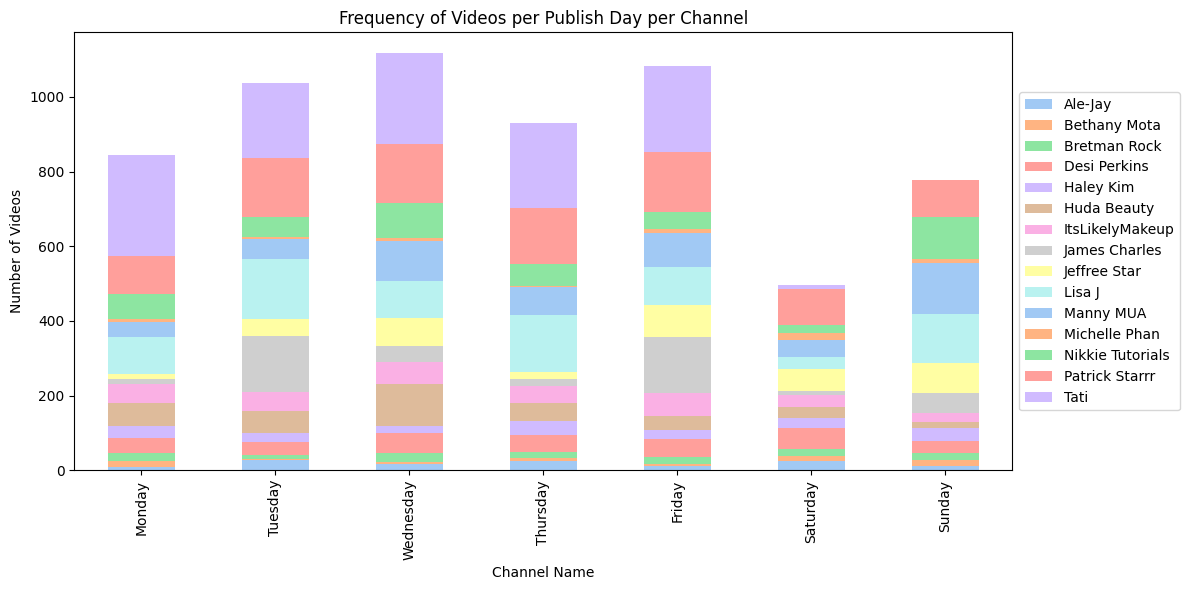

In [61]:
# the frequency of videos uploaded per day per channel and show the legend next to the plot
# Define the custom order for days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by publish_day and sort by the custom order
yt_data['publish_day'] = pd.Categorical(yt_data['publish_day'], categories=days_order, ordered=True)

yt_data.groupby(['publish_day', 'channel_name']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Frequency of Videos per Publish Day per Channel')
plt.xlabel('Channel Name')
plt.ylabel('Number of Videos')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()


In [62]:
# print average number of rows per day of the week
print("Average number of videos per day of the week: " + str(yt_data.groupby('publish_day').size().mean()))
# average number of rows per month
print("Average number of videos per month: " + str(yt_data.groupby('publish_month').size().mean()))
# average number of videos per year
print("Average number of videos per year: " + str(yt_data.groupby('publish_year').size().mean()))


Average number of videos per day of the week: 897.8571428571429
Average number of videos per month: 523.75
Average number of videos per year: 628.5


C:\Users\20193694\AppData\Local\Temp\ipykernel_16276\3496654386.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Average number of videos per day of the week: " + str(yt_data.groupby('publish_day').size().mean()))
C:\Users\20193694\AppData\Local\Temp\ipykernel_16276\3496654386.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Average number of videos per month: " + str(yt_data.groupby('publish_month').size().mean()))


#### title_length

In [63]:
yt_data['title_length'].describe()

count    6285.000000
mean       48.307399
std        17.940040
min         1.000000
25%        35.000000
50%        46.000000
75%        59.000000
max       100.000000
Name: title_length, dtype: float64

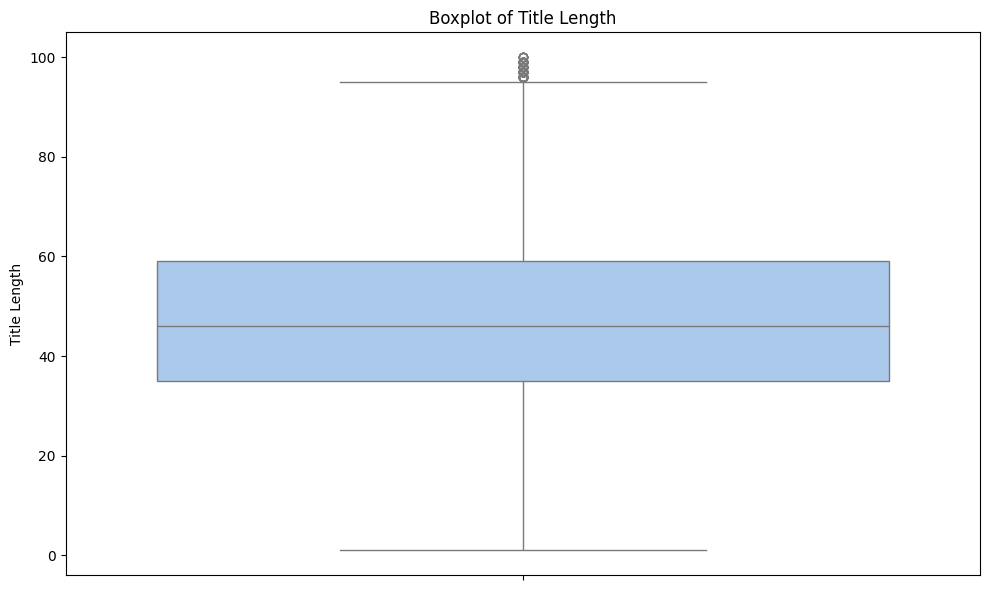

In [64]:
# boxplot of title_length
plt.figure(figsize=(10, 6))
sns.boxplot(data=yt_data, y='title_length')
plt.title('Boxplot of Title Length')
plt.ylabel('Title Length')
plt.tight_layout()


### view_count

In [67]:
yt_data['view_count'].describe()

count    6.285000e+03
mean     1.928751e+06
std      4.383272e+06
min      3.270000e+02
25%      6.739200e+04
50%      5.589100e+05
75%      1.617712e+06
max      6.210868e+07
Name: view_count, dtype: float64

In [69]:
# ik wil eigenlijk alle variabelen naast view count zetten, misschien alle gemiddeldes per chanel
# per youtube channel the mean of view_count, tags_count, title_similarity, subscriber_count, duration_minutes, days_since_last_upload, title_length
yt_data.groupby('channel_name').agg({
    'view_count': 'mean',
    'tags_count': 'mean',
    'title_originality': 'mean',
    'subscriber_count': 'mean',
    'duration_minutes': 'mean',
    'days_since_last_upload': 'mean',
    'title_length': 'mean'
}).sort_values(by='view_count', ascending=False).reset_index()

channel_name    view_count  tags_count  title_originality  \
0      James Charles  9.428199e+06   22.178490           0.329719   
1       Jeffree Star  6.507337e+06   21.932115           0.309790   
2       Bretman Rock  4.371326e+06    6.669421           0.399338   
3   Nikkie Tutorials  4.093442e+06   33.250000           0.289774   
4      Michelle Phan  1.609414e+06   44.044776           0.423347   
5       Bethany Mota  1.343680e+06   16.550725           0.397285   
6               Tati  1.127714e+06   26.430262           0.331010   
7          Manny MUA  1.013737e+06   26.182657           0.310044   
8       Desi Perkins  6.816946e+05   17.675159           0.338129   
9     Patrick Starrr  5.090653e+05    9.609967           0.375577   
10         Haley Kim  4.238592e+05    9.303483           0.307983   
11       Huda Beauty  4.219907e+05    4.232877           0.369767   
12           Ale-Jay  2.312334e+05    7.656000           0.279914   
13   ItsLikelyMakeup  1.489958e+05   13.690402           0.261971   
14            Lisa J  3.863681e+04   15.625000           0.309438   

    subscriber_count  duration_minutes  days_since_last_upload  title_length  
0         24000000.0         14.095271                6.869565     37.727689  
1         15700000.0         18.717363                6.485640     51.383812  
2          8770000.0         15.578650               24.933884     38.801653  
3         14800000.0         12.888304                7.491228     46.515351  
4          8560000.0          7.584826               52.082090     34.910448  
5          9360000.0          8.315217               40.347826     42.956522  
6          7990000.0         14.701522                2.541843     38.584954  
7          4840000.0         17.325707                6.202952     52.544280  
8          3140000.0         14.510563                6.614650     42.920382  
9          4830000.0          7.249296                3.518960     55.468039  
10         1320000.0          5.539635               15.268657     46.238806  
11         4170000.0          3.227717                9.378082     63.528767  
12          611000.0          4.421333               14.272000     48.408000  
13          685000.0         11.510630                8.835913     52.597523  
14          348000.0         12.528436                4.219072     54.014175

## OLS assumptions checks

### Check for assumption 1: linearity

Tags_count

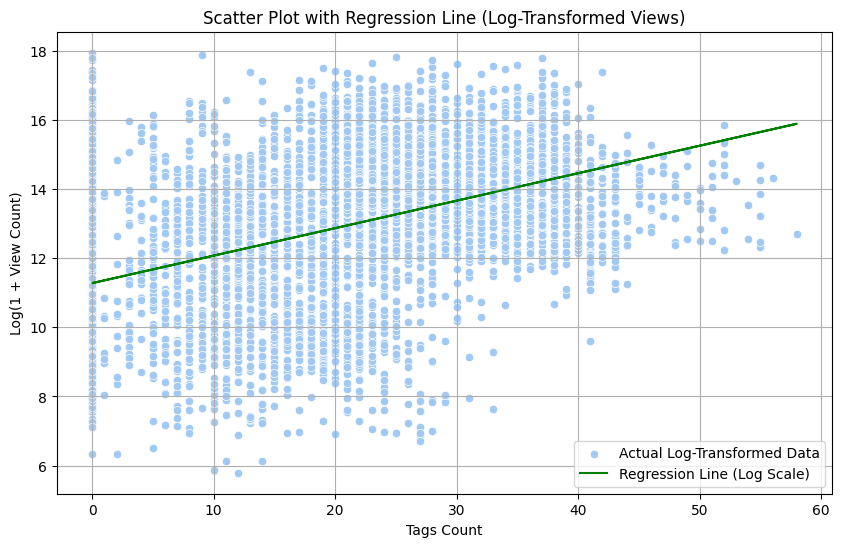

In [70]:
# 1. Visualizing the Relationship
yt_data['log_view_count'] = np.log1p(yt_data['view_count'])

# Step 2: Use the new 'log_view_count' in your OLS formula
model = smf.ols('log_view_count ~ tags_count ', data=yt_data).fit()
# print(model.summary())

# Step 3: Get the predicted values from the robust model (these will be on the log scale)
predicted_log_views = model.fittedvalues

# Step 4: Plot the scatter plot and the robust regression line
# Ensure the scatter plot's y-axis also uses the log-transformed views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tags_count', y='log_view_count', data=yt_data, label='Actual Log-Transformed Data')
plt.plot(yt_data['tags_count'], predicted_log_views, color='green', label='Regression Line (Log Scale)')
plt.xlabel('Tags Count')
plt.ylabel('Log(1 + View Count)') # Label the y-axis appropriately
plt.title('Scatter Plot with Regression Line (Log-Transformed Views)')
plt.legend()
plt.grid(True)
plt.show()

Title_similarity

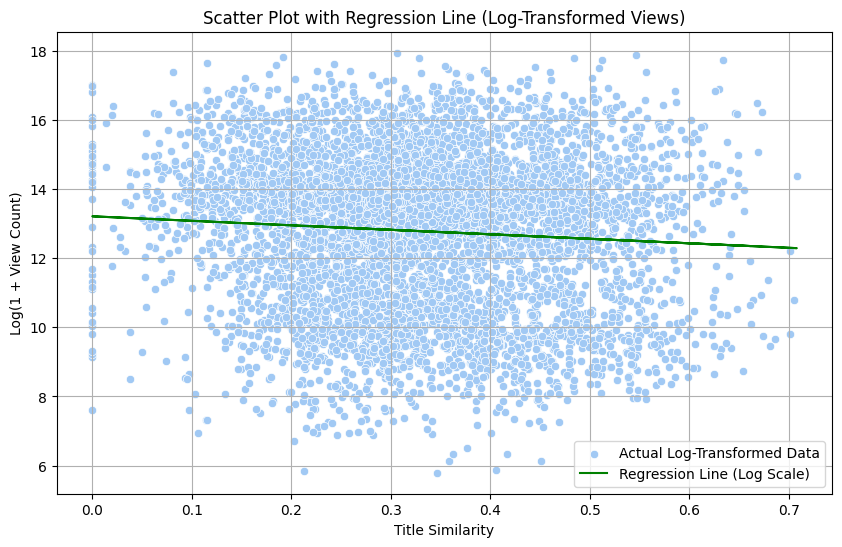

In [74]:
# 1. Visualizing the Relationship
yt_data['log_view_count'] = np.log1p(yt_data['view_count'])

# Step 2: Use the new 'log_view_count' in your OLS formula
model = smf.ols('log_view_count ~ title_originality', data=yt_data).fit()
# print(model.summary())

# Step 3: Get the predicted values from the robust model (these will be on the log scale)
predicted_log_views = model.fittedvalues

# Step 4: Plot the scatter plot and the robust regression line
# Ensure the scatter plot's y-axis also uses the log-transformed views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='title_originality', y='log_view_count', data=yt_data, label='Actual Log-Transformed Data')
plt.plot(yt_data['title_originality'], predicted_log_views, color='green', label='Regression Line (Log Scale)')
plt.xlabel('Title Similarity')
plt.ylabel('Log(1 + View Count)') # Label the y-axis appropriately
plt.title('Scatter Plot with Regression Line (Log-Transformed Views)')
plt.legend()
plt.grid(True)
plt.show()

#### Linearity for control variables vs log_view_count

Subscriber_count

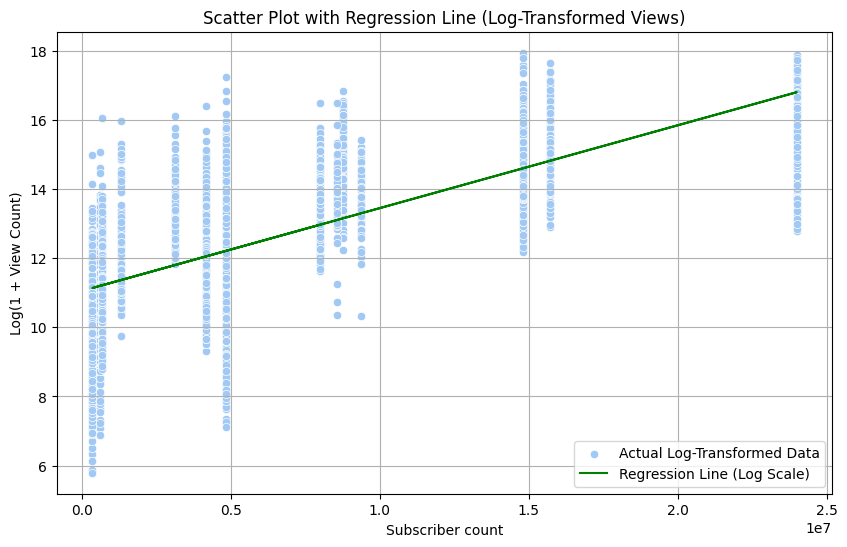

In [75]:
# 1. Visualizing the Relationship
yt_data['log_view_count'] = np.log1p(yt_data['view_count'])

# Step 2: Use the new 'log_view_count' in your OLS formula
model = smf.ols('log_view_count ~ subscriber_count', data=yt_data).fit()
# print(model.summary())

# Step 3: Get the predicted values from the robust model (these will be on the log scale)
predicted_log_views = model.fittedvalues

# Step 4: Plot the scatter plot and the robust regression line
# Ensure the scatter plot's y-axis also uses the log-transformed views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subscriber_count', y='log_view_count', data=yt_data, label='Actual Log-Transformed Data')
plt.plot(yt_data['subscriber_count'], predicted_log_views, color='green', label='Regression Line (Log Scale)')
plt.xlabel('Subscriber count')
plt.ylabel('Log(1 + View Count)') # Label the y-axis appropriately
plt.title('Scatter Plot with Regression Line (Log-Transformed Views)')
plt.legend()
plt.grid(True)
plt.show()

Duration_minutes

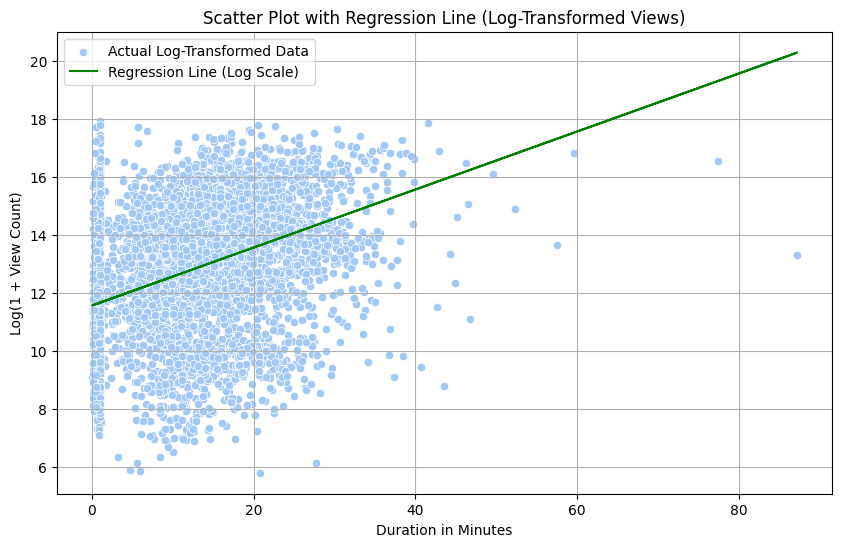

In [76]:
# 1. Visualizing the Relationship
yt_data['log_view_count'] = np.log1p(yt_data['view_count'])

# Step 2: Use the new 'log_view_count' in your OLS formula
model = smf.ols('log_view_count ~ duration_minutes', data=yt_data).fit()
# print(model.summary())

# Step 3: Get the predicted values from the robust model (these will be on the log scale)
predicted_log_views = model.fittedvalues

# Step 4: Plot the scatter plot and the robust regression line
# Ensure the scatter plot's y-axis also uses the log-transformed views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_minutes', y='log_view_count', data=yt_data, label='Actual Log-Transformed Data')
plt.plot(yt_data['duration_minutes'], predicted_log_views, color='green', label='Regression Line (Log Scale)')
# plt.xlim(0, 40) # Sets the x-axis limits
plt.xlabel('Duration in Minutes')
plt.ylabel('Log(1 + View Count)') # Label the y-axis appropriately
plt.title('Scatter Plot with Regression Line (Log-Transformed Views)')
plt.legend()
plt.grid(True)
plt.show()

Days_since_last_upload

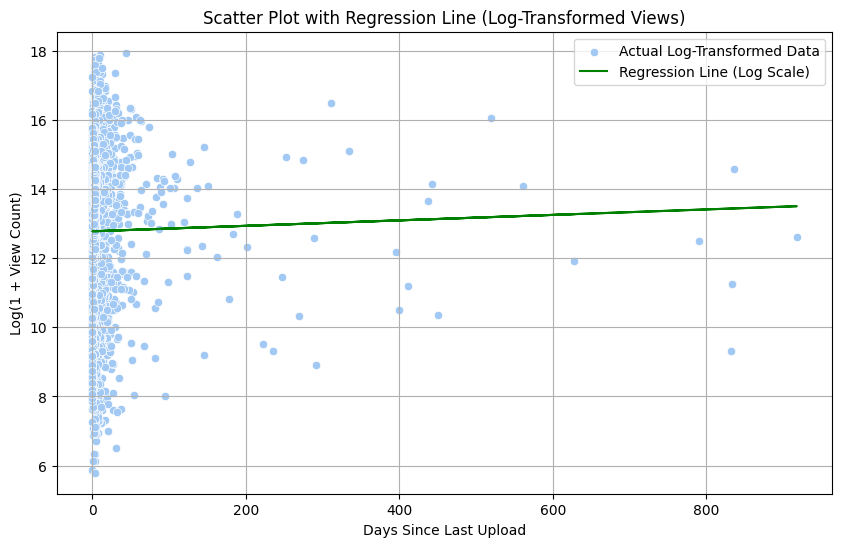

In [77]:
# 1. Visualizing the Relationship
yt_data['log_view_count'] = np.log1p(yt_data['view_count'])

# Step 2: Use the new 'log_view_count' in your OLS formula
model = smf.ols('log_view_count ~ days_since_last_upload', data=yt_data).fit()
# print(model.summary())

# Step 3: Get the predicted values from the robust model (these will be on the log scale)
predicted_log_views = model.fittedvalues

# Step 4: Plot the scatter plot and the robust regression line
# Ensure the scatter plot's y-axis also uses the log-transformed views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days_since_last_upload', y='log_view_count', data=yt_data, label='Actual Log-Transformed Data')
plt.plot(yt_data['days_since_last_upload'], predicted_log_views, color='green', label='Regression Line (Log Scale)')
# plt.xlim(0, 40) # Sets the x-axis limits
plt.xlabel('Days Since Last Upload')
plt.ylabel('Log(1 + View Count)') # Label the y-axis appropriately
plt.title('Scatter Plot with Regression Line (Log-Transformed Views)')
plt.legend()
plt.grid(True)
plt.show()

Publish_year (if not linear, this will become a dummy variable)

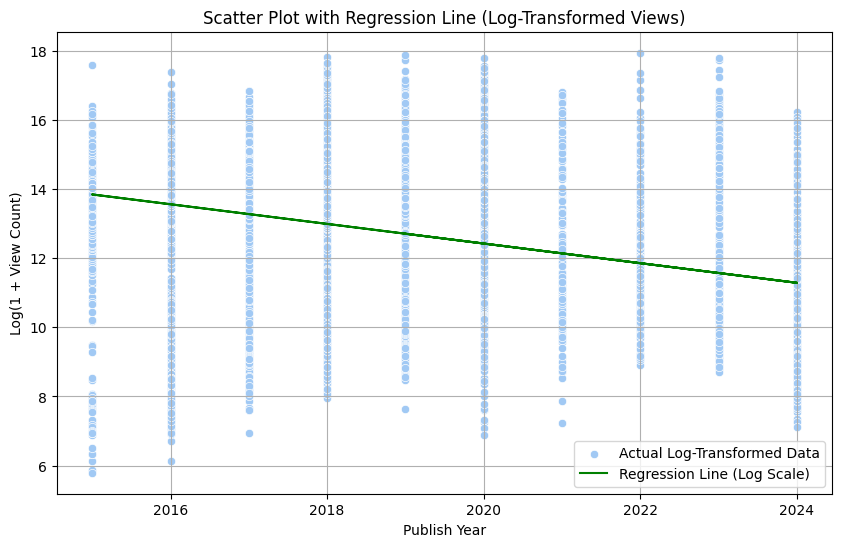

In [78]:
# 1. Visualizing the Relationship
yt_data['log_view_count'] = np.log1p(yt_data['view_count'])

# Step 2: Use the new 'log_view_count' in your OLS formula
model = smf.ols('log_view_count ~ publish_year', data=yt_data).fit()
# print(model.summary())

# Step 3: Get the predicted values from the robust model (these will be on the log scale)
predicted_log_views = model.fittedvalues

# Step 4: Plot the scatter plot and the robust regression line
# Ensure the scatter plot's y-axis also uses the log-transformed views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_year', y='log_view_count', data=yt_data, label='Actual Log-Transformed Data')
plt.plot(yt_data['publish_year'], predicted_log_views, color='green', label='Regression Line (Log Scale)')
# plt.xlim(0, 40) # Sets the x-axis limits
plt.xlabel('Publish Year')
plt.ylabel('Log(1 + View Count)') # Label the y-axis appropriately
plt.title('Scatter Plot with Regression Line (Log-Transformed Views)')
plt.legend()
plt.grid(True)
plt.show()

### Check for assumption 2: Normality of the error terms

Model 1: tags_count + control -> views

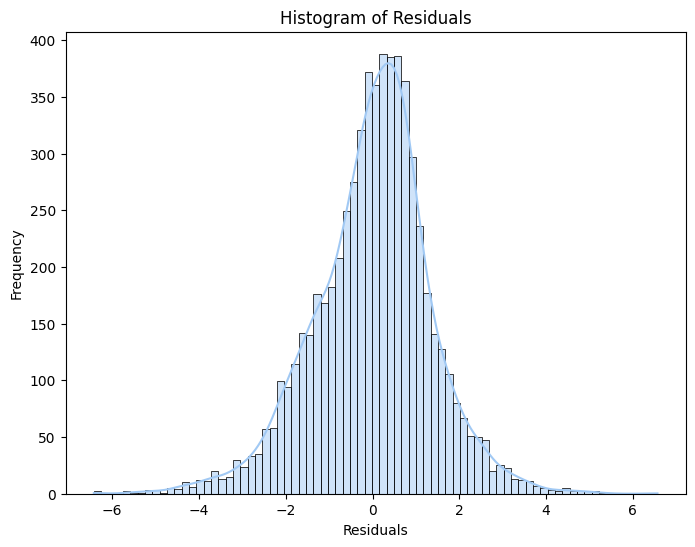

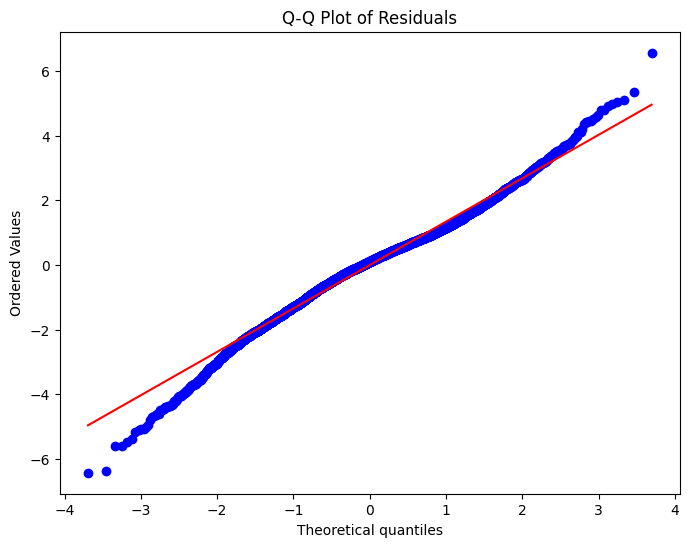

In [79]:
model = smf.ols('log_view_count ~ tags_count + duration_minutes + subscriber_count + days_since_last_upload + title_length + publish_year + publish_month + publish_day', data=yt_data).fit()

# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(model.resid, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot of Residuals
plt.figure(figsize=(8, 6))
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

model 2: title_similarity + control -> views

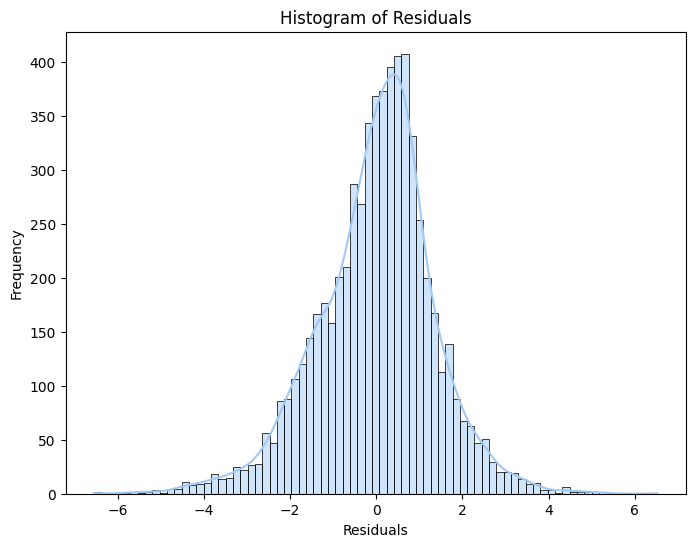

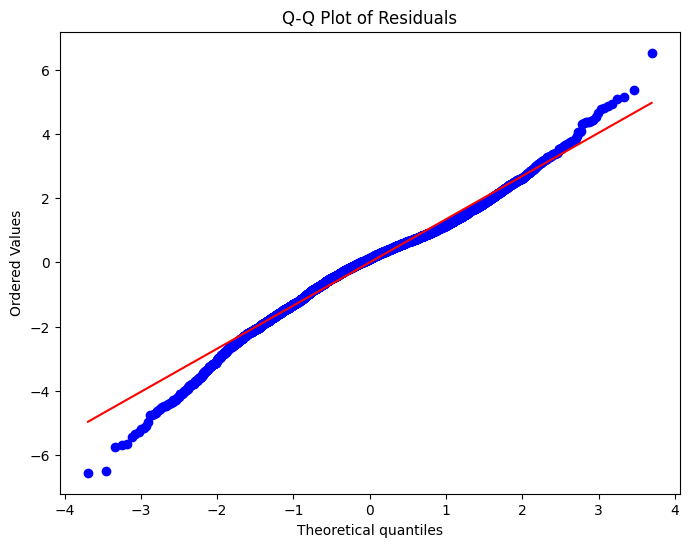

In [81]:
model = smf.ols('log_view_count ~ title_originality + duration_minutes + subscriber_count + days_since_last_upload + title_length + publish_year + publish_month + publish_day', data=yt_data).fit()

# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(model.resid, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot of Residuals
plt.figure(figsize=(8, 6))
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

model 3: tags_count + title_similarity + control -> views

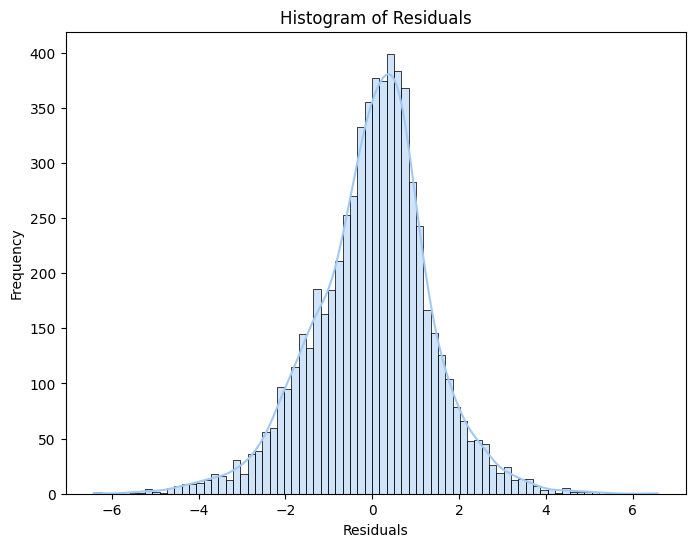

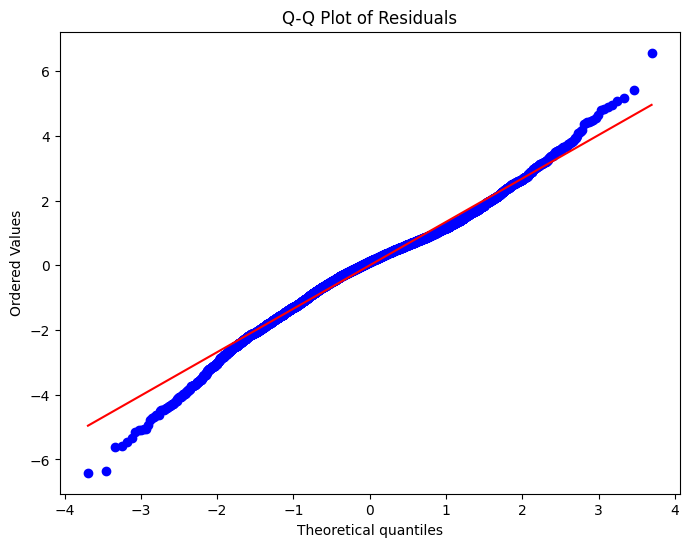

In [82]:
model = smf.ols('log_view_count ~ tags_count + title_originality + duration_minutes + subscriber_count + days_since_last_upload + title_length + publish_year + publish_month + publish_day', data=yt_data).fit()

# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(model.resid, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot of Residuals
plt.figure(figsize=(8, 6))
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

### Assumption 3: No multicollinearity among predictors

In [83]:
yt_data['publish_year'] = yt_data['publish_year'].astype(str)
yt_data['publish_month'] = yt_data['publish_month'].astype(str)
yt_data['publish_day'] = yt_data['publish_day'].astype(str)

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


--- Checking for Multicollinearity ---

1. Correlation Heatmap of Numerical Predictor Variables:


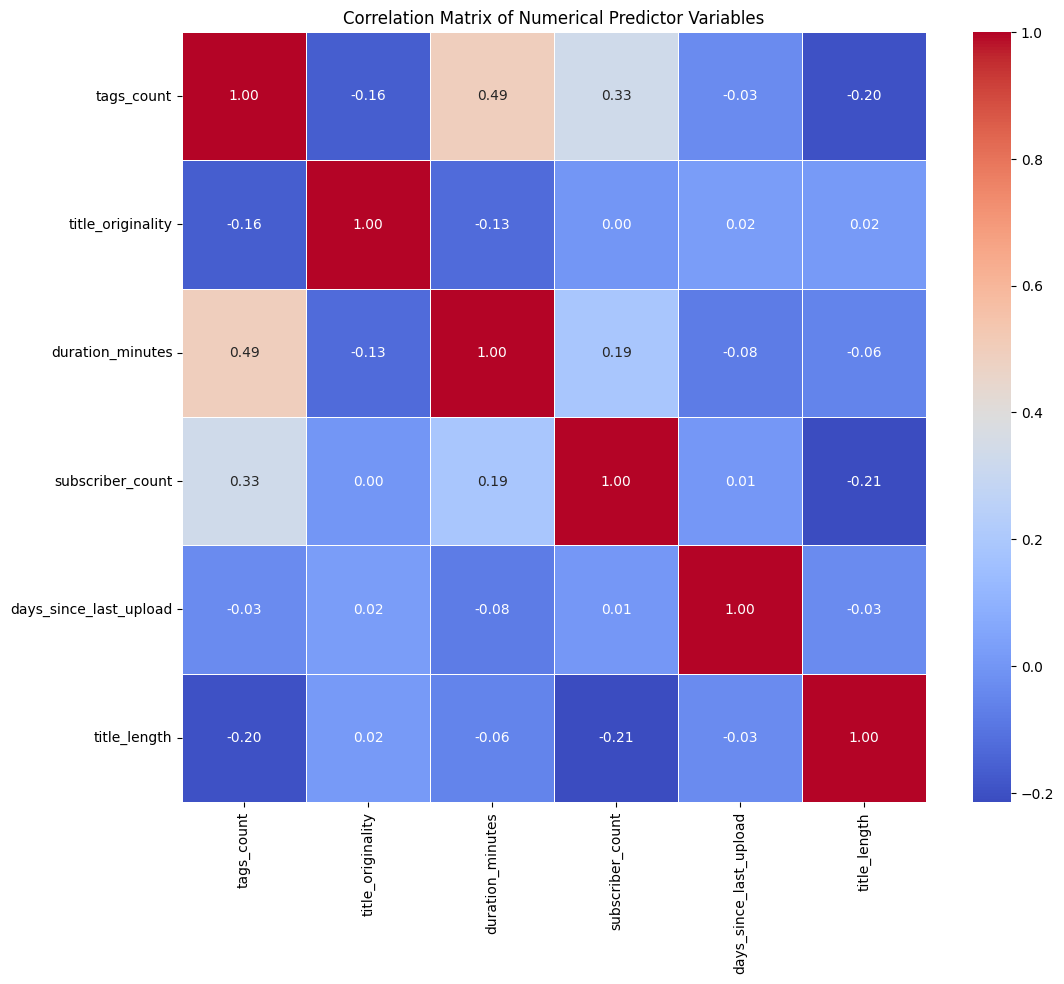


2. Variance Inflation Factors (VIFs) for All Predictors:
                    feature       VIF
1         publish_year_2024  2.890568
2         publish_year_2018  2.338940
3          duration_minutes  2.309056
4         publish_year_2023  2.271593
5                tags_count  2.237981
6         publish_year_2017  2.214018
7         publish_year_2019  2.187564
8         publish_year_2016  2.009309
9         publish_year_2020  1.903503
10    publish_month_October  1.886906
11        publish_year_2022  1.856033
12    publish_month_January  1.853091
13   publish_month_December  1.848668
14   publish_month_February  1.833644
15        publish_month_May  1.822857
16      publish_month_March  1.807983
17     publish_month_August  1.794738
18  publish_month_September  1.787736
19       publish_month_July  1.773970
20   publish_month_November  1.748501
21       publish_month_June  1.748483
22    publish_day_Wednesday  1.697341
23      publish_day_Tuesday  1.648875
24     publish_day_Thursday  1

In [86]:
predictor_cols = [
    'tags_count',
    'title_originality',
    'duration_minutes',
    'subscriber_count',
    'days_since_last_upload',
    'title_length',
    'publish_year',
    'publish_month',
    'publish_day'
]

# --- Prepare Design Matrix for VIF Calculation ---
# pd.get_dummies will automatically one-hot encode string columns and keep numerical ones as is.
# drop_first=True avoids perfect multicollinearity for the intercept term.
X_for_vif = pd.get_dummies(yt_data[predictor_cols],
                           drop_first=True,
                           dtype=int) # Ensure dummy variables are 0 or 1 integers

# Add a constant (intercept) term to the design matrix. VIF also checks for collinearity with the intercept.
X_for_vif_const = sm.add_constant(X_for_vif)

# --- Multicollinearity Check ---

print("--- Checking for Multicollinearity ---")

## 1. Correlation Heatmap of Numerical Predictors
# This plot helps identify strong pairwise correlations among your original numerical variables.
print("\n1. Correlation Heatmap of Numerical Predictor Variables:")
plt.figure(figsize=(12, 10))
# Select only numerical columns for the heatmap, as correlation is undefined for non-numeric types.
numerical_predictor_cols = yt_data[predictor_cols].select_dtypes(include=np.number).columns
correlation_matrix = yt_data[numerical_predictor_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Predictor Variables')
plt.show()

## 2. Variance Inflation Factors (VIFs) Overview
# VIF quantifies the severity of multicollinearity in an OLS regression.
# It indicates how much the variance of an estimated regression coefficient is inflated
# due to multicollinearity.
print("\n2. Variance Inflation Factors (VIFs) for All Predictors:")

vif_data = pd.DataFrame()
vif_data["feature"] = X_for_vif_const.columns

# Calculate VIF for each feature in the design matrix
vif_data["VIF"] = [variance_inflation_factor(X_for_vif_const.values, i)
                   for i in range(X_for_vif_const.shape[1])]

# Sort VIFs for better readability and remove the 'const' (intercept) row
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
vif_data = vif_data[vif_data['feature'] != 'const']

print(vif_data)

# --- VIF Interpretation Guidelines ---
print("\n--- VIF Interpretation Guidelines ---")
print("VIF values help identify features that are highly correlated with other features:")
print("- **VIF = 1:** No correlation.")
print("- **VIF between 1 and 5:** Generally considered acceptable.")
print("- **VIF between 5 and 10:** Moderate multicollinearity. Investigate.")
print("- **VIF > 10:** High multicollinearity. This can make coefficients unstable and their significance misleading.")

### Assumption 4: No autocorrelation in the error terms

In [87]:
from statsmodels.stats.stattools import durbin_watson 

model 1:

In [88]:
# IMPORTANT: Sort your data by the 'published_at' datetime column.
# This is crucial for the Durbin-Watson test's validity.
yt_data = yt_data.sort_values(by='published_at').reset_index(drop=True)

model = smf.ols('log_view_count ~ tags_count + duration_minutes + subscriber_count + days_since_last_upload + title_length + publish_year + publish_month + publish_day', data=yt_data).fit()

# --- 3. Perform Durbin-Watson Test ---

print("--- Durbin-Watson Test for Autocorrelation ---")
# The Durbin-Watson statistic is directly available as an attribute of the fitted model.
# 1. Get the residuals from your fitted model
residuals = model.resid
# 2. Pass the residuals to the durbin_watson function
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_statistic:.4f}")

# --- 4. Interpretation ---

print("\n--- Interpretation of Durbin-Watson Statistic ---")
print("The Durbin-Watson statistic ranges from 0 to 4:")
print("- **Approximately 2.0:** This is the ideal value, indicating **no autocorrelation** in the residuals.")
print("- **Less than 2.0 (closer to 0):** Suggests **positive autocorrelation**. This means if an error in one observation is positive, the next error is likely also positive.")
print("- **Greater than 2.0 (closer to 4):** Suggests **negative autocorrelation**. This means errors tend to alternate signs (positive, then negative, then positive, etc.).")

--- Durbin-Watson Test for Autocorrelation ---
Durbin-Watson Statistic: 2.0166

--- Interpretation of Durbin-Watson Statistic ---
The Durbin-Watson statistic ranges from 0 to 4:
- **Approximately 2.0:** This is the ideal value, indicating **no autocorrelation** in the residuals.
- **Less than 2.0 (closer to 0):** Suggests **positive autocorrelation**. This means if an error in one observation is positive, the next error is likely also positive.
- **Greater than 2.0 (closer to 4):** Suggests **negative autocorrelation**. This means errors tend to alternate signs (positive, then negative, then positive, etc.).


model 2:

In [90]:
# IMPORTANT: Sort your data by the 'published_at' datetime column.
# This is crucial for the Durbin-Watson test's validity.
yt_data = yt_data.sort_values(by='published_at').reset_index(drop=True)

model = smf.ols('log_view_count ~ title_originality + duration_minutes + subscriber_count + days_since_last_upload + title_length + publish_year + publish_month + publish_day', data=yt_data).fit()

# --- 3. Perform Durbin-Watson Test ---

print("--- Durbin-Watson Test for Autocorrelation ---")
# The Durbin-Watson statistic is directly available as an attribute of the fitted model.
# 1. Get the residuals from your fitted model
residuals = model.resid
# 2. Pass the residuals to the durbin_watson function
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_statistic:.4f}")

# --- 4. Interpretation ---

print("\n--- Interpretation of Durbin-Watson Statistic ---")
print("The Durbin-Watson statistic ranges from 0 to 4:")
print("- **Approximately 2.0:** This is the ideal value, indicating **no autocorrelation** in the residuals.")
print("- **Less than 2.0 (closer to 0):** Suggests **positive autocorrelation**. This means if an error in one observation is positive, the next error is likely also positive.")
print("- **Greater than 2.0 (closer to 4):** Suggests **negative autocorrelation**. This means errors tend to alternate signs (positive, then negative, then positive, etc.).")

--- Durbin-Watson Test for Autocorrelation ---
Durbin-Watson Statistic: 2.0262

--- Interpretation of Durbin-Watson Statistic ---
The Durbin-Watson statistic ranges from 0 to 4:
- **Approximately 2.0:** This is the ideal value, indicating **no autocorrelation** in the residuals.
- **Less than 2.0 (closer to 0):** Suggests **positive autocorrelation**. This means if an error in one observation is positive, the next error is likely also positive.
- **Greater than 2.0 (closer to 4):** Suggests **negative autocorrelation**. This means errors tend to alternate signs (positive, then negative, then positive, etc.).


model 3:

In [91]:
# IMPORTANT: Sort your data by the 'published_at' datetime column.
# This is crucial for the Durbin-Watson test's validity.
yt_data = yt_data.sort_values(by='published_at').reset_index(drop=True)

model = smf.ols('log_view_count ~ tags_count + title_originality + duration_minutes + subscriber_count + days_since_last_upload + title_length + publish_year + publish_month + publish_day', data=yt_data).fit()

# --- 3. Perform Durbin-Watson Test ---

print("--- Durbin-Watson Test for Autocorrelation ---")
# The Durbin-Watson statistic is directly available as an attribute of the fitted model.
# 1. Get the residuals from your fitted model
residuals = model.resid
# 2. Pass the residuals to the durbin_watson function
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_statistic:.4f}")

# --- 4. Interpretation ---

print("\n--- Interpretation of Durbin-Watson Statistic ---")
print("The Durbin-Watson statistic ranges from 0 to 4:")
print("- **Approximately 2.0:** This is the ideal value, indicating **no autocorrelation** in the residuals.")
print("- **Less than 2.0 (closer to 0):** Suggests **positive autocorrelation**. This means if an error in one observation is positive, the next error is likely also positive.")
print("- **Greater than 2.0 (closer to 4):** Suggests **negative autocorrelation**. This means errors tend to alternate signs (positive, then negative, then positive, etc.).")


--- Durbin-Watson Test for Autocorrelation ---
Durbin-Watson Statistic: 2.0187

--- Interpretation of Durbin-Watson Statistic ---
The Durbin-Watson statistic ranges from 0 to 4:
- **Approximately 2.0:** This is the ideal value, indicating **no autocorrelation** in the residuals.
- **Less than 2.0 (closer to 0):** Suggests **positive autocorrelation**. This means if an error in one observation is positive, the next error is likely also positive.
- **Greater than 2.0 (closer to 4):** Suggests **negative autocorrelation**. This means errors tend to alternate signs (positive, then negative, then positive, etc.).


### Assumption 5: Homoskedasticity 

model 1:


A. Visual Inspection: Residuals vs. Fitted Values Plot
Look for a random, evenly distributed scatter of points around zero across the entire range of fitted values. Avoid 'fan' or 'cone' shapes.


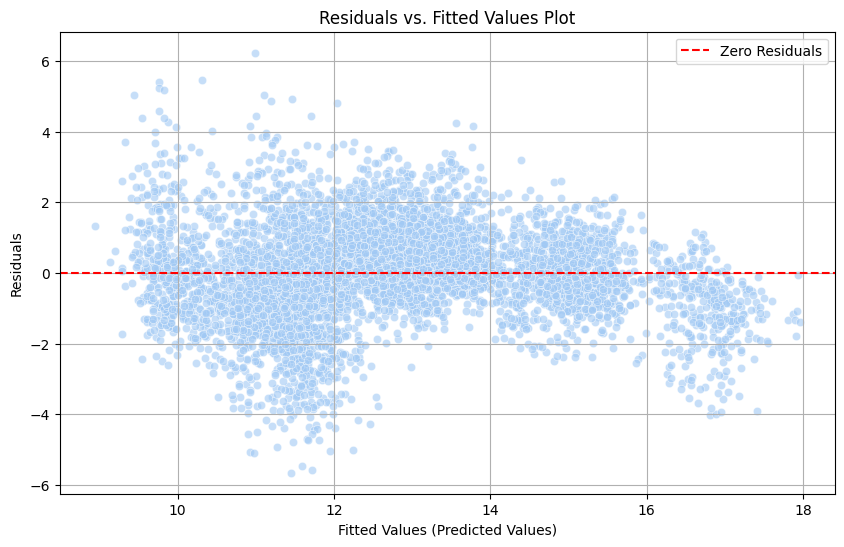

In [92]:
print("\nA. Visual Inspection: Residuals vs. Fitted Values Plot")
print("Look for a random, evenly distributed scatter of points around zero across the entire range of fitted values. Avoid 'fan' or 'cone' shapes.")

model = smf.ols('log_view_count ~ tags_count + duration_minutes + subscriber_count + days_since_last_upload + title_length + publish_year + publish_month + publish_day', data=yt_data).fit()

residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')
plt.xlabel('Fitted Values (Predicted Values)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.grid(True)
plt.legend()
plt.show()

model 2:


A. Visual Inspection: Residuals vs. Fitted Values Plot
Look for a random, evenly distributed scatter of points around zero across the entire range of fitted values. Avoid 'fan' or 'cone' shapes.


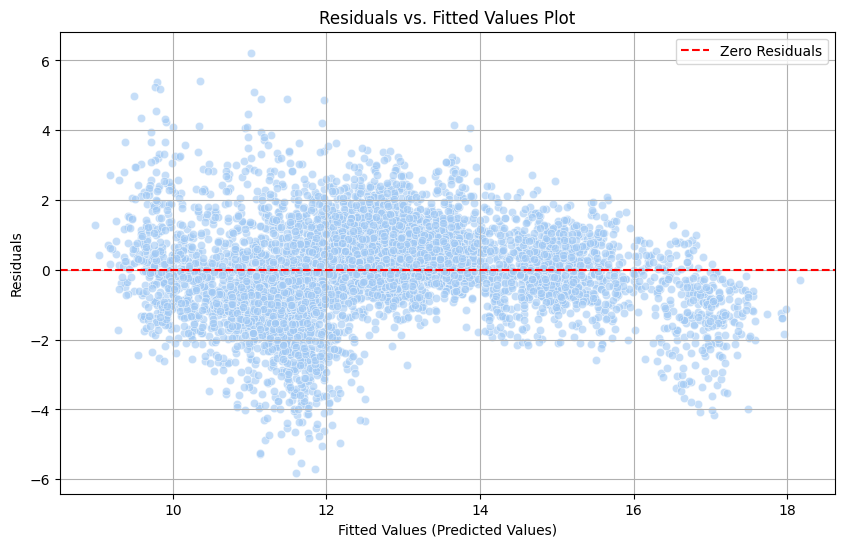

In [94]:
print("\nA. Visual Inspection: Residuals vs. Fitted Values Plot")
print("Look for a random, evenly distributed scatter of points around zero across the entire range of fitted values. Avoid 'fan' or 'cone' shapes.")

model = smf.ols('log_view_count ~ title_originality + duration_minutes + subscriber_count + days_since_last_upload + title_length + publish_year + publish_month + publish_day', data=yt_data).fit()

residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')
plt.xlabel('Fitted Values (Predicted Values)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.grid(True)
plt.legend()
plt.show()

model 3:


A. Visual Inspection: Residuals vs. Fitted Values Plot
Look for a random, evenly distributed scatter of points around zero across the entire range of fitted values. Avoid 'fan' or 'cone' shapes.


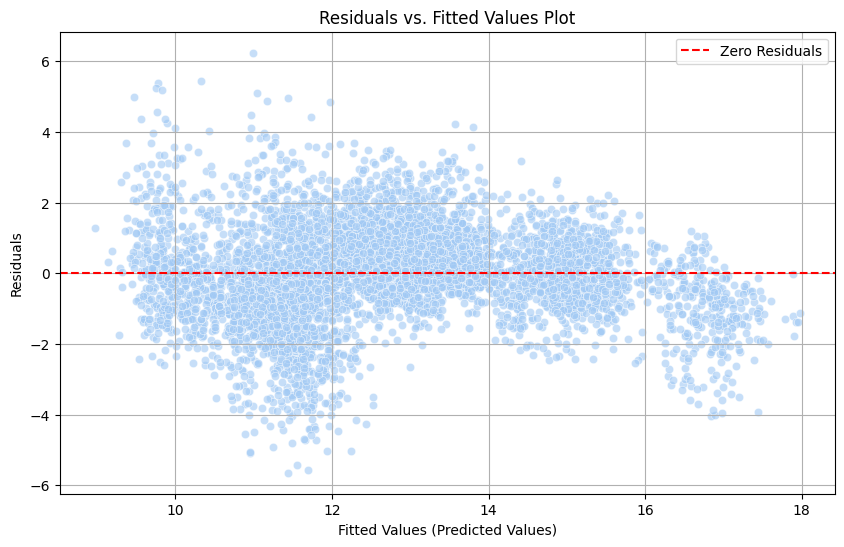

In [95]:
print("\nA. Visual Inspection: Residuals vs. Fitted Values Plot")
print("Look for a random, evenly distributed scatter of points around zero across the entire range of fitted values. Avoid 'fan' or 'cone' shapes.")

model = smf.ols('log_view_count ~ tags_count + title_originality + duration_minutes + subscriber_count + days_since_last_upload + title_length + publish_year + publish_month + publish_day', data=yt_data).fit()

residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')
plt.xlabel('Fitted Values (Predicted Values)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.grid(True)
plt.legend()
plt.show()

### Fitting the models:

model 1: 

In [97]:
model = smf.ols('log_view_count ~ tags_count + duration_minutes + subscriber_count + days_since_last_upload + title_length + publish_year + publish_month + publish_day', data=yt_data).fit()
# 3. Print the Model Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_view_count   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     355.2
Date:                Wed, 06 Aug 2025   Prob (F-statistic):               0.00
Time:                        19:23:15   Log-Likelihood:                -10621.
No. Observations:                6285   AIC:                         2.131e+04
Df Residuals:                    6253   BIC:                         2.152e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

model 2:

In [99]:
model = smf.ols('log_view_count ~ title_originality + duration_minutes + subscriber_count + days_since_last_upload + title_length + publish_year + publish_month + publish_day', data=yt_data).fit()
# 3. Print the Model Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_view_count   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     351.9
Date:                Wed, 06 Aug 2025   Prob (F-statistic):               0.00
Time:                        19:23:21   Log-Likelihood:                -10640.
No. Observations:                6285   AIC:                         2.134e+04
Df Residuals:                    6253   BIC:                         2.156e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

model 3:

In [100]:
model = smf.ols('log_view_count ~ tags_count + title_originality + duration_minutes + subscriber_count + days_since_last_upload + title_length + publish_year + publish_month + publish_day', data=yt_data).fit()
# 3. Print the Model Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_view_count   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     344.2
Date:                Wed, 06 Aug 2025   Prob (F-statistic):               0.00
Time:                        19:23:26   Log-Likelihood:                -10620.
No. Observations:                6285   AIC:                         2.131e+04
Df Residuals:                    6252   BIC:                         2.153e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Practical examples of low/high tags_originality and title_originality

In [117]:
# print the following columns as a dataframe for the unique three rows with the lowest tags_originality values that are larger than 0: channel_name, title, tags_originality, tags, view_count, published_at
low_tags_originality = yt_data[yt_data['tags_originality'] > 0].nsmallest(3, 'tags_originality')[['channel_name', 'title', 'tags_originality', 'tags', 'view_count', 'published_at']]
low_tags_originality

#3316
#4432

channel_name                                              title  \
3316       Lisa J      my go to 5 minute or less eye makeup tutorial   
4432      Ale-Jay  my simple everyday makeup look quick 5 minute ...   
3416       Lisa J  stop wasting your money makeup brushes everyth...   

      tags_originality                                               tags  \
3316          0.010647  ['5 Minute Makeup', 'makeup tutorial', 'easy m...   
4432          0.010647  ['everyday makeup look', 'natural makeup', 'ev...   
3416          0.013398  ['Brushes', 'makeup brushes', 'make up brushes...   

      view_count               published_at  
3316       27390  2018-11-06 14:00:03+00:00  
4432        1414  2020-04-02 20:00:11+00:00  
3416      173644  2018-12-12 14:00:07+00:00

In [124]:
# print row 3316 in low_tags_originality
print(low_tags_originality.iloc[1]['tags'])

['everyday makeup look', 'natural makeup', 'everyday makeup', '5 minute makeup', 'quick makeup tutorial', 'makeup for beginners', 'quick 5 minute makeup tutorial', 'quick 5 minute makeup', 'simple everyday makeup tutorial', 'simple makeup tutorial']


In [106]:
# print the following columns as a dataframe for the unique three rows with the lowest title_originality values: channel_name, title, tags_originality, tags, view_count, published_at
low_title_originality = yt_data.nsmallest(100, 'title_originality')[['channel_name', 'title', 'title_originality', 'tags', 'view_count', 'published_at']]
low_title_originality

channel_name                                              title  \
184               Tati                        get ready with me coachella   
191       Desi Perkins                             husband does my makeup   
371               Tati                             whats in my makeup bag   
836             Lisa J                             whats in my makeup bag   
853   Nikkie Tutorials                take her swimming on the first date   
...                ...                                                ...   
3755    Patrick Starrr  full face of first impressions makeup tutorial...   
207          Manny MUA  jeffree star liquid lipsticks swatches and rev...   
1249      Jeffree Star  chanel liquid lipsticks review swatches jeffre...   
833               Tati                                 skincare favorites   
1702         Manny MUA                         current skincare favorites   

      title_originality                                               tags  \
184            0.000000  ['YouTube', 'Beauty', 'Tutorial', 'Products', ...   
191            0.000000  ['Husband Does My Makeup', 'steven perkins', '...   
371            0.000000  ['YouTube', 'Beauty', 'Makeup', 'Tutorial', 'P...   
836            0.000000  ["what's in my makeup bag", 'sephora', 'tom fo...   
853            0.000000  ["april fool's", 'joke', 'take her swimming on...   
...                 ...                                                ...   
3755           0.068603  ['makeup', 'transformation', 'theepatrickstarr...   
207            0.069360  ['2-23-15', 'Jeffree Star (Musical Artist)', '...   
1249           0.069360  ['chanel', 'jeffree star', 'chanel rouge allur...   
833            0.070166  ['YouTube', 'Beauty', 'Makeup', 'Tutorial', 'P...   
1702           0.070166  ['8-16-15', 'skincare', 'skincare must haves',...   

      view_count               published_at  
184       201541  2015-04-14 17:00:04+00:00  
191      2369791  2015-04-17 19:03:06+00:00  
371       401694  2015-07-24 17:00:03+00:00  
836         2019  2016-03-25 23:54:35+00:00  
853      8773799  2016-04-02 19:56:28+00:00  
...          ...                        ...  
3755      301977  2019-04-30 18:59:46+00:00  
207      1604935  2015-04-24 19:12:58+00:00  
1249     2342594  2016-09-27 20:00:28+00:00  
833       794991  2016-03-25 17:24:51+00:00  
1702      500349  2017-03-16 20:03:09+00:00  

[100 rows x 6 columns]

In [131]:
# print the following columns as a dataframe for the unique three rows with the highest tags_originality: channel_name, title, tags_originality, tags, view_count, published_at
high_tags_originality = yt_data.nlargest(4, 'tags_originality')[['channel_name', 'title', 'tags_originality', 'tags', 'view_count', 'published_at']]
high_tags_originality

channel_name                                              title  \
3369     Haley Kim  new glossier generation g lipstick all 6 swatc...   
453    Huda Beauty                    nikkie tutorials does my makeup   
152   Desi Perkins                 street style lookbook desi perkins   
2110     Haley Kim        60 seconds of travel notting hill haley kim   

      tags_originality                                               tags  \
3369          0.746553  ['Glossier', 'Newgenerationg', 'GLossierlipsti...   
453           0.536109  ['iMovie', 'مكياج', 'هدى بيوتي', 'مكياج سهرة',...   
152           0.519764  ['StreetStyle Lookbook', '15-3-19_lookbook_des...   
2110          0.499839                            ['notting hill', '노팅힐']   

      view_count               published_at  
3369      204287  2018-11-26 12:00:02+00:00  
453      1163256  2015-09-08 20:33:23+00:00  
152       490031  2015-03-27 19:55:40+00:00  
2110       17303  2017-08-10 13:26:05+00:00

In [130]:
# print the first row in high_tags_originality
print(high_tags_originality.iloc[1]['tags'])

['iMovie', 'مكياج', 'هدى بيوتي', 'مكياج سهرة', 'مكياج عربي', 'مكياج لبناني', 'مكياج روعه', 'مكياج بالخطوات', 'طريقة عمل المكياج', 'nikkietutorials', 'مكياج العيد', 'مكياج عيد الأضحى', 'hudabeauty', 'huda kattan', 'hudabeauty lashes', 'huda beauty collabs']


In [113]:
# Within the group of videos with the lowest title_originality, find the ones that have a similar title
similar_titles = yt_data[yt_data['title'].str.contains('how to', case=False, na=False) | yt_data['title'].str.contains('tutorial', case=False, na=False)]
similar_titles = similar_titles.nsmallest(100, 'title_originality')[['channel_name', 'title', 'title_originality', 'tags', 'view_count', 'published_at']]
similar_titles

# sort on title: i want to see the titles that are duplicates but from different channels
similar_titles_sorted = similar_titles.sort_values(by='title')
similar_titles_sorted = similar_titles_sorted.drop_duplicates(subset='title', keep=False)
similar_titles_sorted[['channel_name', 'title', 'title_originality', 'tags', 'view_count', 'published_at']]
similar_titles.head(30)


channel_name                                              title  \
96        Desi Perkins                           everyday makeup tutorial   
897    ItsLikelyMakeup                           everyday makeup tutorial   
1302      Jeffree Star  kylie jenner the burgundy palette review tutorial   
1357  Nikkie Tutorials  kylie jenner the burgundy palette review tutorial   
401               Tati                      easy everyday makeup tutorial   
495               Tati                      easy everyday makeup tutorial   
1341    Patrick Starrr  diy alien halloween makeup tutorial patrickstarrr   
4089      Desi Perkins                    alien halloween makeup tutorial   
1298   ItsLikelyMakeup                  vampire halloween makeup tutorial   
2282  Nikkie Tutorials         vampire princess halloween makeup tutorial   
2240         Manny MUA  laura lee cats pajamas palette review tutorial...   
306   Nikkie Tutorials                                   eyebrow tutorial   
5408           Ale-Jay                     eyebrow tutorial for beginners   
387   Nikkie Tutorials                       kylie jenner makeup tutorial   
513     Patrick Starrr         kylie jenner makeup tutorial patrickstarrr   
1123    Patrick Starrr         kylie jenner makeup tutorial patrickstarrr   
801       Jeffree Star  manny mua x makeup geek palette tutorial jeffr...   
1636         Manny MUA  new jeffree star androgyny palette makeup tuto...   
390               Tati                        makeup tutorial summer glam   
2969   ItsLikelyMakeup              easy summer time glam makeup tutorial   
267       Desi Perkins      taylor swift bad blood makeup tutorial collab   
268   Nikkie Tutorials    taylor swift inspired bad blood makeup tutorial   
1786              Tati        easy five minute smokey eye makeup tutorial   
4732         Haley Kim               beginners smokey eye makeup tutorial   
4377  Nikkie Tutorials        led lights makeup challenge nikkietutorials   
1509    Patrick Starrr           smokey eye makeup tutorial patrickstarrr   
1610    Patrick Starrr       valentines day makeup tutorial patrickstarrr   
4919   ItsLikelyMakeup                       a valentines makeup tutorial   
278       Desi Perkins                          new eyebrow tutorial 2015   
1923   ItsLikelyMakeup  new makeup full face of first impressions make...   

      title_originality                                               tags  \
96         1.192093e-07  ['Cosmetics (Quotation Subject)', 'Beauty Tips...   
897        1.192093e-07  ['makeup', 'freckles', 'fake freckles', 'lashe...   
1302       2.384186e-07  ['jeffree star', 'jeffree star cosmetics', 'ky...   
1357       2.384186e-07  ['kylie jenner', 'kylie', 'jenner', 'kylie cos...   
401        2.799416e-02  ['YouTube', 'Beauty', 'Makeup', 'Tutorial', 'P...   
495        2.799416e-02  ['YouTube', 'Beauty', 'Makeup', 'Tutorial', 'P...   
1341       3.268862e-02  ['makeup', 'transformation', 'theepatrickstarr...   
4089       3.268862e-02  ['DESI PERKINS', 'desi perkins', 'the perkins'...   
1298       3.791916e-02  ['its likely makeup', 'halloween', 'victorian ...   
2282       3.791916e-02  ['vampire', 'vampire makeup', 'vampire hallowe...   
2240       3.839815e-02  ['Laura lee', 'laura88lee', 'laura lee los ang...   
306        5.264485e-02  ['Eyebrow tutorial', 'eyebrow', 'tutorial', 'm...   
5408       5.264485e-02                                                 []   
387        5.382866e-02  ['kylie jenner', 'kylie', 'jenner', 'kylie jen...   
513        5.382866e-02  ['makeup', 'transformation', 'theepatrickstarr...   
1123       5.382866e-02  ['PatrickStarrr', 'Patrick', 'Starrr', 'Makeup...   
801        5.473351e-02  ['mannymua', 'makeup geek', 'jeffree star', 't...   
1636       5.473351e-02  ['8-16-15', 'Jeffree star', 'androgyny palette...   
390        5.747223e-02  ['YouTube', 'Beauty', 'Makeup', 'Tutorial', 'P...   
2969       5.747223e-02  ['makeup', 'makeup tutorial', 'tutori

In [115]:
# print the following columns as a dataframe for the unique three rows with the highest title_originality values: channel_name, title, tags_originality, tags, view_count, published_at
high_title_originality = yt_data.nlargest(10, 'title_originality')[['channel_name', 'title', 'title_originality', 'tags_originality', 'tags', 'view_count', 'published_at']]
high_title_originality


channel_name                                             title  \
3222       Manny MUA                                    where ive been   
3582          Lisa J                   benefits and uses of marula oil   
4829       Manny MUA                 is this app using me should i sue   
5597  Patrick Starrr                                   alvin said what   
5633  Patrick Starrr                                         oh my god   
5938  Patrick Starrr                                                oh   
5595  Patrick Starrr        whos your favorite alvin simon or theodore   
5912  Patrick Starrr                             what kind of memories   
3932    Bretman Rock  why she built like that finally answered mukbang   
5746  Patrick Starrr                  any greys anatomy fans out there   

      title_originality  tags_originality  \
3222           0.708123          0.253682   
3582           0.705518          0.078533   
4829           0.701777          0.064830   
5597           0.701100               NaN   
5633           0.686423               NaN   
5938           0.680892               NaN   
5595           0.679002               NaN   
5912           0.674219               NaN   
3932           0.672948               NaN   
5746           0.672448               NaN   

                                                   tags  view_count  \
3222  ['mannymua', 'mannymua733', 'manny mua back', ...     1732621   
3582  ['Maelove', 'Marula Oil', 'marula oil for face...       48657   
4829  ['app', 'this app', 'beauty app', 'eye art', '...      198668   
5597                                                 []       18353   
5633                                                 []       15901   
5938                                                 []       12949   
5595                                                 []       85519   
5912                                                 []       17168   
3932                                                 []    11122150   
5746                                                 []       56257   

                   published_at  
3222  2018-10-05 18:11:09+00:00  
3582  2019-02-14 14:00:00+00:00  
4829  2020-12-20 20:07:23+00:00  
5597  2023-10-31 23:00:10+00:00  
5633  2023-12-05 20:46:03+00:00  
5938  2024-06-06 14:00:04+00:00  
5595  2023-10-31 19:46:47+00:00  
5912  2024-05-23 19:18:58+00:00  
3932  2019-07-28 22:47:06+00:00  
5746  2024-02-13 17:40:28+00:00